In [22]:
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *

In [2]:
#df_final_all
all_results = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_FDR_corrected_newest.csv")

In [22]:
all_results

burden_gene      target_gene              burden_type    pvalue  \
0        ENSG00000228463  ENSG00000228463               CADD_PHRED  0.393581   
1        ENSG00000228327  ENSG00000228327               CADD_PHRED  0.348254   
2        ENSG00000237491  ENSG00000237491               CADD_PHRED  0.617412   
3        ENSG00000225880  ENSG00000225880               CADD_PHRED  0.924011   
4        ENSG00000230368  ENSG00000230368               CADD_PHRED  0.532657   
...                  ...              ...                      ...       ...   
1034784  ENSG00000100138  ENSG00000100138  GENE_TSS_DISTANCE_SAIGE  0.748266   
1034785  ENSG00000183172  ENSG00000183172  GENE_TSS_DISTANCE_SAIGE  0.162003   
1034786  ENSG00000184983  ENSG00000184983  GENE_TSS_DISTANCE_SAIGE  0.893728   
1034787  ENSG00000100300  ENSG00000100300  GENE_TSS_DISTANCE_SAIGE  0.376597   
1034788  ENSG00000170638  ENSG00000170638  GENE_TSS_DISTANCE_SAIGE  0.127100   

             beta     cell_type  chromosome  significant  FDR_corrected  \
0       -0.004054        CD8 ET           1        False       0.955526   
1       -0.002507        CD8 ET           1        False       0.947938   
2       -0.001265        CD8 ET           1        False       0.979683   
3       -0.000300        CD8 ET           1        False       0.997450   
4        0.002424        CD8 ET           1        False       0.970296   
...           ...           ...         ...          ...            ...   
1034784  0.087600  Erythrocytes          22        False       0.979290   
1034785  0.232128  Erythrocytes          22        False       0.979290   
1034786  0.034688  Erythrocytes          22        False       0.979290   
1034787  0.222862  Erythrocytes          22        False       0.979290   
1034788  0.397016  Erythrocytes          22        False       0.979290   

                          celltype-annotation  
0                           CD8 ET-CADD_PHRED  
1                           CD8 ET-CADD_PHRED  
2                           CD8 ET-CADD_PHRED  
3                           CD8 ET-CADD_PHRED  
4                           CD8 ET-CADD_PHRED  
...                                       ...  
1034784  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
1034785  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
1034786  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
1034787  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  
1034788  Erythrocytes-GENE_TSS_DISTANCE_SAIGE  

[1034789 rows x 10 columns]

In [3]:
# df_final_to_plot_all
all_results_plot = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_summary.csv")

In [20]:
all_results_plot

celltype               annotation   n  \
0          CD8 ET               CADD_PHRED  27   
1          CD8 ET                DNA_LM_up   1   
2          CD8 ET              DNA_LM_down   1   
3          CD8 ET            MAF_beta_1.25  19   
4          CD8 ET             DNA_LM_mixed   7   
..            ...                      ...  ..   
107  Erythrocytes              DNA_LM_down   0   
108  Erythrocytes            MAF_beta_1.25   0   
109  Erythrocytes             DNA_LM_mixed   0   
110  Erythrocytes        GENE_TSS_DISTANCE   0   
111  Erythrocytes  GENE_TSS_DISTANCE_SAIGE   1   

                      celltype_annotation  
0                       CD8 ET_CADD_PHRED  
1                        CD8 ET_DNA_LM_up  
2                      CD8 ET_DNA_LM_down  
3                    CD8 ET_MAF_beta_1.25  
4                     CD8 ET_DNA_LM_mixed  
..                                    ...  
107              Erythrocytes_DNA_LM_down  
108            Erythrocytes_MAF_beta_1.25  
109             Erythrocytes_DNA_LM_mixed  
110        Erythrocytes_GENE_TSS_DISTANCE  
111  Erythrocytes_GENE_TSS_DISTANCE_SAIGE  

[112 rows x 4 columns]

In [2]:
chr6_annotations=pd.read_pickle ("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/annotations/chr6_data.pkl")

In [96]:
df_6 = all_results[all_results['chromosome'] == 6]

In [99]:
df_6.sort_values(by='pvalue').head(3)


burden_gene      target_gene              burden_type  \
263898  ENSG00000124614  ENSG00000124614  GENE_TSS_DISTANCE_SAIGE   
423802  ENSG00000204632  ENSG00000204632  GENE_TSS_DISTANCE_SAIGE   
263756  ENSG00000204632  ENSG00000204632  GENE_TSS_DISTANCE_SAIGE   

              pvalue      beta cell_type  chromosome  significant  \
263898  8.938260e-55  0.153450    CD4 NC           6         True   
423802  6.864767e-44  0.063631        NK           6         True   
263756  2.719660e-41  0.030679    CD4 NC           6         True   

        FDR_corrected             celltype-annotation  
263898   3.151184e-51  CD4 NC-GENE_TSS_DISTANCE_SAIGE  
423802   4.246888e-40      NK-GENE_TSS_DISTANCE_SAIGE  
263756   6.392108e-38  CD4 NC-GENE_TSS_DISTANCE_SAIGE

In [4]:
chr6_annotations.gdata.var

chrom        pos a0 a1       AF      ER2      maf       R2  \
snp_id                                                                       
6_158499_C_G        6     158499  C  G  0.00049      NaN  0.00049  0.80416   
6_162345_G_A        6     162345  G  A  0.00048      NaN  0.00048  0.94714   
6_188937_G_A        6     188937  G  A  0.12591  0.54748  0.12591  0.94971   
6_202452_C_T        6     202452  C  T  0.06816      NaN  0.06816  0.84829   
6_202777_C_T        6     202777  C  T  0.05478      NaN  0.05478  0.87790   
...               ...        ... .. ..      ...      ...      ...      ...   
6_170917570_G_A     6  170917570  G  A  0.00050      NaN  0.00050  0.88225   
6_170917755_T_C     6  170917755  T  C  0.04403      NaN  0.04403  0.91421   
6_170917760_T_G     6  170917760  T  G  0.04404      NaN  0.04404  0.91381   
6_170918264_T_G     6  170918264  T  G  0.04437      NaN  0.04437  0.91689   
6_170919470_G_A     6  170919470  G  A  0.12043  0.96807  0.12043  0.99953   

                 contig           id  id_mask  quality  
snp_id                                                  
6_158499_C_G          0     6:158499    False      NaN  
6_162345_G_A          0     6:162345    False      NaN  
6_188937_G_A          0     6:188937    False      NaN  
6_202452_C_T          0     6:202452    False      NaN  
6_202777_C_T          0     6:202777    False      NaN  
...                 ...          ...      ...      ...  
6_170917570_G_A       0  6:170917570    False      NaN  
6_170917755_T_C       0  6:170917755    False      NaN  
6_170917760_T_G       0  6:170917760    False      NaN  
6_170918264_T_G       0  6:170918264    False      NaN  
6_170919470_G_A       0  6:170919470    False      NaN  

[822879 rows x 12 columns]

In [6]:
chr6_annotations.gdata.varm["annotations_0"]


Feature_type Existing_variation CLIN_SIG SOMATIC  \
snp_id                                                             
6_158499_C_G               -        rs576908573        -       -   
6_162345_G_A               -        rs544129497        -       -   
6_188937_G_A      Transcript         rs10155688        -       -   
6_202452_C_T      Transcript          rs7766035        -       -   
6_202777_C_T      Transcript         rs12206347        -       -   
...                      ...                ...      ...     ...   
6_170917570_G_A            -        rs772860811        -       -   
6_170917755_T_C            -        rs139564968        -       -   
6_170917760_T_G            -        rs149336614        -       -   
6_170918264_T_G            -        rs139576839        -       -   
6_170919470_G_A            -         rs12530134        -       -   

                 gnomADe_AMR_AF  gnomADe_ASJ_AF  gnomADe_NFE_AF  \
snp_id                                                            
6_158499_C_G                NaN             NaN             NaN   
6_162345_G_A                NaN             NaN             NaN   
6_188937_G_A                NaN             NaN             NaN   
6_202452_C_T                NaN             NaN             NaN   
6_202777_C_T                NaN             NaN             NaN   
...                         ...             ...             ...   
6_170917570_G_A             NaN             NaN             NaN   
6_170917755_T_C             NaN             NaN             NaN   
6_170917760_T_G             NaN             NaN             NaN   
6_170918264_T_G             NaN             NaN             NaN   
6_170919470_G_A             NaN             NaN             NaN   

                 gnomADe_OTH_AF  gnomADe_FIN_AF  \
snp_id                                            
6_158499_C_G                NaN             NaN   
6_162345_G_A                NaN             NaN   
6_188937_G_A                NaN             NaN   
6_202452_C_T                NaN             NaN   
6_202777_C_T                NaN             NaN   
...                         ...             ...   
6_170917570_G_A             NaN             NaN   
6_170917755_T_C             NaN             NaN   
6_170917760_T_G             NaN             NaN   
6_170918264_T_G             NaN             NaN   
6_170919470_G_A             NaN             NaN   

                 Consequence_intergenic_variant  ...  \
snp_id                                           ...   
6_158499_C_G                                  1  ...   
6_162345_G_A                                  1  ...   
6_188937_G_A                                  0  ...   
6_202452_C_T                                  0  ...   
6_202777_C_T                                  0  ...   
...                                         ...  ...   
6_170917570_G_A                               1  ...   
6_170917755_T_C                               1  ...   
6_170917760_T_G                               1  ...   
6_170918264_T_G                               1  ...   
6_170919470_G_A                               1  ...   

                 Consequence_splice_polypyrimidine_tract_variant  \
snp_id                                                             
6_158499_C_G                                                   0   
6_162345_G_A                                                   0   
6_188937_G_A                                                   0   
6_202452_C_T                                                   0   
6_202777_C_T                                                   0   
...                                                          ...   
6_170917570_G_A                                                0   
6_170917755_T_C                                                0   
6_170917760_T_G                                                0   
6_170918264_T_G                                                0   
6_170919470_G_A                                   

In [3]:
chr6_annotations

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Cells (adata)                                          ┃ Donors (gdata)                                         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ View of AnnData object with n_obs × n_vars = 1272489 × │ View of AnnData object with n_obs × n_vars = 981 ×     │
│ 1493                                                   │ 822879                                                 │
│     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA',   │     var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2',      │
│ 'pool', 'individual', 'percent.mt', 'latent',          │ 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'      │
│ 'nCount_SCT', 'nFeature_SCT', 'cell_type',             │                                                        │
│ 'cell_label', 'sex', 'age'                             │                                                        │
│     var: 'GeneSymbol', 'features', 'chromosome',       │     varm: 'annotations_0', 'annotations_1',            │
│ 'start', 'end'                                         │ 'annotations_2', 'annotations_3', 'annotations_4',     │
│                                                        │ 'annotations_5', 'annotations_6'                       │
│     uns: 'log1p'                                       │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [7]:
chr6_annotations.gdata.varm["annotations_1"]

Gene          Feature cDNA_position CDS_position  \
snp_id                                                                         
6_158499_C_G                   -                -             -            -   
6_162345_G_A                   -                -             -            -   
6_188937_G_A     ENSG00000263667  ENST00000580119             -            -   
6_202452_C_T     ENSG00000263667  ENST00000580119             -            -   
6_202777_C_T     ENSG00000263667  ENST00000580119             -            -   
...                          ...              ...           ...          ...   
6_170917570_G_A                -                -             -            -   
6_170917755_T_C                -                -             -            -   
6_170917760_T_G                -                -             -            -   
6_170918264_T_G                -                -             -            -   
6_170919470_G_A                -                -             -            -   

                Protein_position Amino_acids Codons    IMPACT  DISTANCE  \
snp_id                                                                    
6_158499_C_G                   -           -      -         -       0.0   
6_162345_G_A                   -           -      -         -       0.0   
6_188937_G_A                   -           -      -  MODIFIER       NaN   
6_202452_C_T                   -           -      -  MODIFIER       NaN   
6_202777_C_T                   -           -      -  MODIFIER       NaN   
...                          ...         ...    ...       ...       ...   
6_170917570_G_A                -           -      -         -       0.0   
6_170917755_T_C                -           -      -         -       0.0   
6_170917760_T_G                -           -      -         -       0.0   
6_170918264_T_G                -           -      -         -       0.0   
6_170919470_G_A                -           -      -         -       0.0   

                 STRAND  ... Consequence_splice_donor_5th_base_variant  \
snp_id                   ...                                             
6_158499_C_G        0.0  ...                                         0   
6_162345_G_A        0.0  ...                                         0   
6_188937_G_A       -1.0  ...                                         0   
6_202452_C_T       -1.0  ...                                         0   
6_202777_C_T       -1.0  ...                                         0   
...                 ...  ...                                       ...   
6_170917570_G_A     0.0  ...                                         0   
6_170917755_T_C     0.0  ...                                         0   
6_170917760_T_G     0.0  ...                                         0   
6_170918264_T_G     0.0  ...                                         0   
6_170919470_G_A     0.0  ...                                         0   

                Consequence_splice_donor_region_variant  \
snp_id                                                    
6_158499_C_G                                          0   
6_162345_G_A                                          0   
6_188937_G_A                                          0   
6_202452_C_T                                          0   
6_202777_C_T                                          0   
...                                                 ...   
6_170917570_G_A                                       0   
6_170917755_T_C                                       0   
6_170917760_T_G                                       0   
6_170918264_T_G                                       0   
6_170919470_G_A                                       0   

                Consequence_splice_donor_variant  \
snp_id                                             
6_158499_C_G                                   0   
6_162345_G_A                                   0   
6_188937_G_A                                   0   
6_202452_C_T        

In [8]:
chr6_annotations.gdata.varm["annotations_2"]

Gene          Feature cDNA_position CDS_position  \
snp_id                                                                         
6_158499_C_G                   -                -             -            -   
6_162345_G_A                   -                -             -            -   
6_188937_G_A                   -                -             -            -   
6_202452_C_T     ENSG00000205653  ENST00000381078             -            -   
6_202777_C_T     ENSG00000263667  ENST00000580119             -            -   
...                          ...              ...           ...          ...   
6_170917570_G_A                -                -             -            -   
6_170917755_T_C                -                -             -            -   
6_170917760_T_G                -                -             -            -   
6_170918264_T_G                -                -             -            -   
6_170919470_G_A                -                -             -            -   

                Protein_position Amino_acids Codons    IMPACT  DISTANCE  \
snp_id                                                                    
6_158499_C_G                   -           -      -         -       0.0   
6_162345_G_A                   -           -      -         -       0.0   
6_188937_G_A                   -           -      -         -       0.0   
6_202452_C_T                   -           -      -  MODIFIER     861.0   
6_202777_C_T                   -           -      -  MODIFIER       NaN   
...                          ...         ...    ...       ...       ...   
6_170917570_G_A                -           -      -         -       0.0   
6_170917755_T_C                -           -      -         -       0.0   
6_170917760_T_G                -           -      -         -       0.0   
6_170918264_T_G                -           -      -         -       0.0   
6_170919470_G_A                -           -      -         -       0.0   

                 STRAND  ... Consequence_splice_donor_5th_base_variant  \
snp_id                   ...                                             
6_158499_C_G        0.0  ...                                         0   
6_162345_G_A        0.0  ...                                         0   
6_188937_G_A        0.0  ...                                         0   
6_202452_C_T        1.0  ...                                         0   
6_202777_C_T       -1.0  ...                                         0   
...                 ...  ...                                       ...   
6_170917570_G_A     0.0  ...                                         0   
6_170917755_T_C     0.0  ...                                         0   
6_170917760_T_G     0.0  ...                                         0   
6_170918264_T_G     0.0  ...                                         0   
6_170919470_G_A     0.0  ...                                         0   

                Consequence_splice_donor_region_variant  \
snp_id                                                    
6_158499_C_G                                          0   
6_162345_G_A                                          0   
6_188937_G_A                                          0   
6_202452_C_T                                          0   
6_202777_C_T                                          0   
...                                                 ...   
6_170917570_G_A                                       0   
6_170917755_T_C                                       0   
6_170917760_T_G                                       0   
6_170918264_T_G                                       0   
6_170919470_G_A                                       0   

                Consequence_splice_donor_variant  \
snp_id                                             
6_158499_C_G                                   0   
6_162345_G_A                                   0   
6_188937_G_A                                   0   
6_202452_C_T        

In [6]:
chr6_annotations.adata.obs

orig.ident  nCount_RNA  nFeature_RNA  pool individual  \
barcode                                                                      
AAAGTAGCATCTCCCA-64           0      2353.0           966    62        1_1   
AGCTCCTAGCAGATCG-64           0      4037.0           945    62        1_1   
AGCTCCTAGGGAACGG-64           0      3666.0           965    62        1_1   
GCCAAATCAACTGCTA-64           0      1176.0           492    62        1_1   
AGCTCCTCATTACGAC-64           0      3154.0           784    62        1_1   
...                         ...         ...           ...   ...        ...   
ATTTCTGTCTGCCAGG-57           0      1087.0           501    55  1081_1082   
CGTGTCTTCACATAGC-57           0      3268.0          1141    55  1081_1082   
GCTCCTAAGTAGATGT-57           0      2875.0           897    55  1081_1082   
GCTCCTACAAGGTTTC-57           0      2543.0          1118    55  1081_1082   
TATGCCCTCTCCTATA-57           0      3099.0          1348    55  1081_1082   

                     percent.mt  latent  nCount_SCT  nFeature_SCT  cell_type  \
barcode                                                                        
AAAGTAGCATCTCCCA-64    1.359966       1      2661.0           966          3   
AGCTCCTAGCAGATCG-64    1.634877       1      3117.0           943          4   
AGCTCCTAGGGAACGG-64    1.036552       1      3080.0           964          0   
GCCAAATCAACTGCTA-64    5.272109       1      2652.0           525          3   
AGCTCCTCATTACGAC-64    1.838935       1      2952.0           783          0   
...                         ...     ...         ...           ...        ...   
ATTTCTGTCTGCCAGG-57    4.231831       1      2595.0           535          3   
CGTGTCTTCACATAGC-57    6.303550       1      3034.0          1141         11   
GCTCCTAAGTAGATGT-57    3.339130       1      2875.0           897          5   
GCTCCTACAAGGTTTC-57    3.578451       1      2718.0          1118         14   
TATGCCCTCTCCTATA-57    5.227493       1      2987.0          1348         14   

                    cell_label  sex  age  
barcode                                   
AAAGTAGCATCTCCCA-64     CD8 ET    2   65  
AGCTCCTAGCAGATCG-64     CD8 NC    2   65  
AGCTCCTAGGGAACGG-64     CD4 NC    2   65  
GCCAAATCAACTGCTA-64     CD8 ET    2   65  
AGCTCCTCATTACGAC-64     CD4 NC    2   65  
...                        ...  ...  ...  
ATTTCTGTCTGCCAGG-57     CD8 ET    1   73  
CGTGTCTTCACATAGC-57  Platelets    1   73  
GCTCCTAAGTAGATGT-57  CD8 S100B    1   73  
GCTCCTACAAGGTTTC-57         NK    1   73  
TATGCCCTCTCCTATA-57         NK    1   73  

[1272489 rows x 13 columns]

In [7]:
chr6_all_burdens = pd.read_parquet("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/burdens/chr6_all_burdens.parquet")

In [8]:
chr6_all_burdens

CADD_PHRED  DNA_LM_up  DNA_LM_down  MAF_beta_1.25  DNA_LM_mixed  \
id                                                                           
1_1           307.624   0.584032     1.004855    1650.427014      0.584032   
2_2           499.684   0.439546     0.830870    2271.378043      0.439546   
3_3           135.959   0.282807     0.537380     958.739177      0.282807   
4_4           194.616   0.327971     0.611350    1187.479777      0.327971   
6_6           152.718   0.568391     0.973683    1186.950357      0.568391   
...               ...        ...          ...            ...           ...   
1077_1078     218.833   0.947583     1.365031    1383.778198      1.330090   
1078_1079     284.704   1.103660     1.645698    1760.192846      1.638706   
1079_1080     288.755   0.884240     1.255504    1428.772558      1.255504   
1080_1081     223.192   0.761861     1.069547    1314.484067      1.069547   
1081_1082     432.741   0.835828     1.197555    1819.406105      1.162991   

           GENE_TSS_DISTANCE  GENE_TSS_DISTANCE_SAIGE           Geneid  
id                                                                      
1_1               64153404.0                 2.514564  ENSG00000263667  
2_2               75501356.0                 8.220708  ENSG00000263667  
3_3               31235521.0                 3.933661  ENSG00000263667  
4_4               52933776.0                 3.560905  ENSG00000263667  
6_6               42348955.0                 3.035388  ENSG00000263667  
...                      ...                      ...              ...  
1077_1078         34971295.0                12.281165  ENSG00000225532  
1078_1079         82140923.0                10.656039  ENSG00000225532  
1079_1080         38413891.0                17.964374  ENSG00000225532  
1080_1081         30786369.0                12.459822  ENSG00000225532  
1081_1082         69151079.0                13.807337  ENSG00000225532  

[1464633 rows x 8 columns]

In [9]:
chr6_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr6_all_results.pkl")
chr7_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr7_all_results.pkl")
chr8_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr8_all_results.pkl")
chr9_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr9_all_results.pkl") 
chr10_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr10_all_results.pkl")
chr11_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr11_all_results.pkl")
chr12_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr12_all_results.pkl")
chr13_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr13_all_results.pkl")


In [10]:
chr6_all_results

burden_gene      target_gene              burden_type    pvalue  \
0   ENSG00000112679  ENSG00000112679               CADD_PHRED  0.436418   
1   ENSG00000112679  ENSG00000112679                DNA_LM_up  0.970923   
2   ENSG00000112679  ENSG00000112679              DNA_LM_down  0.869924   
3   ENSG00000112679  ENSG00000112679            MAF_beta_1.25  0.442239   
4   ENSG00000112679  ENSG00000112679             DNA_LM_mixed  0.828050   
..              ...              ...                      ...       ...   
2   ENSG00000071994  ENSG00000071994              DNA_LM_down  0.657193   
3   ENSG00000071994  ENSG00000071994            MAF_beta_1.25  0.440304   
4   ENSG00000071994  ENSG00000071994             DNA_LM_mixed  0.558569   
5   ENSG00000071994  ENSG00000071994        GENE_TSS_DISTANCE  0.225089   
6   ENSG00000071994  ENSG00000071994  GENE_TSS_DISTANCE_SAIGE  0.581999   

        beta cell_type chromosome  
0   0.005827    CD8 ET          6  
1  -0.000272    CD8 ET          6  
2  -0.001222    CD8 ET          6  
3   0.005738    CD8 ET          6  
4  -0.001621    CD8 ET          6  
..       ...       ...        ...  
2   0.037469  CD4 SOX4          6  
3   0.065219  CD4 SOX4          6  
4   0.049358  CD4 SOX4          6  
5   0.102669  CD4 SOX4          6  
6  -0.046797  CD4 SOX4          6  

[55762 rows x 7 columns]

In [11]:
chr22_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr22_all_results.pkl")
                                       

In [12]:
cadd_burden_type = chr22_all_results[chr22_all_results['burden_type'] == 'CADD_PHRED']

In [13]:
cadd_burden_type

burden_gene      target_gene burden_type    pvalue      beta  \
0   ENSG00000100181  ENSG00000100181  CADD_PHRED  0.655488  0.001330   
0   ENSG00000237438  ENSG00000237438  CADD_PHRED  0.698368 -0.000483   
0   ENSG00000177663  ENSG00000177663  CADD_PHRED  0.019447  0.017929   
0   ENSG00000069998  ENSG00000069998  CADD_PHRED  0.611630 -0.004619   
0   ENSG00000185837  ENSG00000185837  CADD_PHRED  0.738575 -0.000334   
..              ...              ...         ...       ...       ...   
0   ENSG00000100138  ENSG00000100138  CADD_PHRED  0.617200  0.137935   
0   ENSG00000183172  ENSG00000183172  CADD_PHRED  0.121510  0.258793   
0   ENSG00000184983  ENSG00000184983  CADD_PHRED  0.368354 -0.234549   
0   ENSG00000100300  ENSG00000100300  CADD_PHRED  0.545066 -0.144067   
0   ENSG00000170638  ENSG00000170638  CADD_PHRED  0.096253  0.430389   

       cell_type chromosome  
0         CD8 ET         22  
0         CD8 ET         22  
0         CD8 ET         22  
0         CD8 ET         22  
0         CD8 ET         22  
..           ...        ...  
0   Erythrocytes         22  
0   Erythrocytes         22  
0   Erythrocytes         22  
0   Erythrocytes         22  
0   Erythrocytes         22  

[4643 rows x 7 columns]

### Correcting p values + Plot eGenes for certain chromsoms

In [14]:
from statsmodels.stats.multitest import multipletests

In [15]:
def FDR_correction(association_results):
    """
    association_results: pd.DataFrame, results from burden_test/ output written in run_burden_ass.py
    
    returns: - df_final: pd.DataFrame, association_results, sorted by celltype and burden type
                                        added column "FDR corrected" values and "significant"
             - df_to_plot: pd.DataFrame, summary of # significant egenes per cell type and burden type
    """
   
    df=association_results.copy()
    df_to_plot = pd.DataFrame(columns=['celltype', 'annotation', 'n'])
    
    df_final=[]
    for celltype in df["cell_type"].unique():
        df_annotations={}
        for annotation in df["burden_type"].unique():
            df_annotations[annotation] = df[(df["cell_type"] == celltype) & (df["burden_type"]==annotation)]
            df_annotations[annotation] = df_annotations[annotation].dropna(how='all')
            # FDR correction
            #[annotation]["significant"], df_annotations[annotation]["FDR_corrected"], _, _ = multipletests(df_annotations[annotation]["pvalue"], alpha=0.05, method='fdr_bh')
            
            df_to_plot = pd.concat([df_to_plot, pd.DataFrame({
                    'celltype': [celltype],
                    'annotation': [annotation],
                    'n': [len(df_annotations[annotation][df_annotations[annotation]["significant"]])]
                })], ignore_index=True)
            df_annotations[annotation]["celltype-annotation"]= f"{celltype}-{annotation}"
            df_final.append(df_annotations[annotation]) 
            
    df_final=pd.concat(df_final)
    
    df_to_plot['celltype_annotation'] = df_to_plot['celltype'] + "_" + df_to_plot['annotation']
    df_to_plot
    return df_final, df_to_plot
        

In [16]:
from plotnine import *
def plot_egenes(df_to_plot):
    """
    df_to_plot: pd.DataFrame, as output[1] of  FDR_correction()
    returns: plot, grouped barplot # egenes per cell type and burden
    """
    zero_types = list(df_to_plot.query("n==0")["celltype_annotation"])
    # Filter out the rows where `n` is 0 and create the plot
    plot = (
        ggplot(df_to_plot.query("celltype_annotation not in @zero_types"), 
               aes(x='celltype', y='n', fill='annotation'))  # Specify x, y, and fill variables
        + geom_bar(stat="identity", position="dodge")  # Use position="dodge" for grouped bars
        + theme_classic()  # Optional: use a clean theme
        + theme(
            axis_text_x=element_text(angle=45, hjust=1, vjust=1),
            figure_size=(7, 4)
        )
        + labs(
            y="Number of E-Genes", 
            x="", 
            fill="Burden Annotation"
        )
        # Optional: Customize colors manually
        # + scale_fill_manual(values=['darkred', "grey", "blue", "green"], 
        #     labels=["GENE_TSS_DISTANCE", "GENE_TSS_DISTANCE_SAIGE", "CADD_PHRED", "DNA_LM_down","DNA_LM_up","DNA_LM_mixed", "MAF_beta_1.25"])
    )
    return(plot)


In [17]:
df_final_6, df_to_plot_6 = FDR_correction(chr6_all_results)
df_final_7, df_to_plot_7 = FDR_correction(chr7_all_results)
df_final_8, df_to_plot_8 = FDR_correction(chr8_all_results)
df_final_9, df_to_plot_9 = FDR_correction(chr9_all_results)
df_final_10, df_to_plot_10 = FDR_correction(chr10_all_results)
df_final_11, df_to_plot_11 = FDR_correction(chr11_all_results)
df_final_12, df_to_plot_12 = FDR_correction(chr12_all_results)
df_final_13, df_to_plot_13 = FDR_correction(chr13_all_results)

In [52]:
df_to_plot_6

celltype               annotation  n               celltype_annotation
0      CD8 ET               CADD_PHRED  9                 CD8 ET_CADD_PHRED
1      CD8 ET                DNA_LM_up  2                  CD8 ET_DNA_LM_up
2      CD8 ET              DNA_LM_down  2                CD8 ET_DNA_LM_down
3      CD8 ET            MAF_beta_1.25  7              CD8 ET_MAF_beta_1.25
4      CD8 ET             DNA_LM_mixed  3               CD8 ET_DNA_LM_mixed
..        ...                      ... ..                               ...
100  CD4 SOX4              DNA_LM_down  0              CD4 SOX4_DNA_LM_down
101  CD4 SOX4            MAF_beta_1.25  0            CD4 SOX4_MAF_beta_1.25
102  CD4 SOX4             DNA_LM_mixed  0             CD4 SOX4_DNA_LM_mixed
103  CD4 SOX4        GENE_TSS_DISTANCE  0        CD4 SOX4_GENE_TSS_DISTANCE
104  CD4 SOX4  GENE_TSS_DISTANCE_SAIGE  0  CD4 SOX4_GENE_TSS_DISTANCE_SAIGE

[105 rows x 4 columns]

In [18]:
df_final_6[df_final_6["significant"]]

burden_gene      target_gene              burden_type        pvalue  \
0   ENSG00000204632  ENSG00000204632               CADD_PHRED  2.184530e-30   
0   ENSG00000066379  ENSG00000066379               CADD_PHRED  1.292122e-04   
0   ENSG00000204520  ENSG00000204520               CADD_PHRED  4.776643e-05   
0   ENSG00000204475  ENSG00000204475               CADD_PHRED  5.500117e-07   
0   ENSG00000204261  ENSG00000204261               CADD_PHRED  1.865811e-05   
..              ...              ...                      ...           ...   
6   ENSG00000234745  ENSG00000234745  GENE_TSS_DISTANCE_SAIGE  2.491142e-05   
6   ENSG00000124614  ENSG00000124614  GENE_TSS_DISTANCE_SAIGE  2.467107e-11   
6   ENSG00000096063  ENSG00000096063  GENE_TSS_DISTANCE_SAIGE  1.425510e-06   
0   ENSG00000014123  ENSG00000014123               CADD_PHRED  1.581199e-04   
3   ENSG00000014123  ENSG00000014123            MAF_beta_1.25  3.048636e-05   

        beta  cell_type chromosome  significant  FDR_corrected  \
0   0.049815     CD8 ET          6         True   1.463635e-27   
0   0.040723     CD8 ET          6         True   1.082152e-02   
0   0.022179     CD8 ET          6         True   4.571930e-03   
0  -0.082090     CD8 ET          6         True   1.228359e-04   
0  -0.059551     CD8 ET          6         True   2.083489e-03   
..       ...        ...        ...          ...            ...   
6   0.122977       NK R          6         True   2.466231e-03   
6   0.298358       NK R          6         True   9.769742e-09   
6   0.174177       NK R          6         True   2.822509e-04   
0   0.198906  Platelets          6         True   4.443170e-02   
3   0.219599  Platelets          6         True   8.566666e-03   

             celltype-annotation  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
0              CD8 ET-CADD_PHRED  
..                           ...  
6   NK R-GENE_TSS_DISTANCE_SAIGE  
6   NK R-GENE_TSS_DISTANCE_SAIGE  
6   NK R-GENE_TSS_DISTANCE_SAIGE  
0           Platelets-CADD_PHRED  
3        Platelets-MAF_beta_1.25  

[348 rows x 10 columns]

In [19]:
df_to_plot_6

celltype               annotation  n               celltype_annotation
0      CD8 ET               CADD_PHRED  9                 CD8 ET_CADD_PHRED
1      CD8 ET                DNA_LM_up  2                  CD8 ET_DNA_LM_up
2      CD8 ET              DNA_LM_down  2                CD8 ET_DNA_LM_down
3      CD8 ET            MAF_beta_1.25  7              CD8 ET_MAF_beta_1.25
4      CD8 ET             DNA_LM_mixed  3               CD8 ET_DNA_LM_mixed
..        ...                      ... ..                               ...
100  CD4 SOX4              DNA_LM_down  0              CD4 SOX4_DNA_LM_down
101  CD4 SOX4            MAF_beta_1.25  0            CD4 SOX4_MAF_beta_1.25
102  CD4 SOX4             DNA_LM_mixed  0             CD4 SOX4_DNA_LM_mixed
103  CD4 SOX4        GENE_TSS_DISTANCE  0        CD4 SOX4_GENE_TSS_DISTANCE
104  CD4 SOX4  GENE_TSS_DISTANCE_SAIGE  0  CD4 SOX4_GENE_TSS_DISTANCE_SAIGE

[105 rows x 4 columns]

In [20]:
df_final_6["celltype-annotation"].value_counts()

celltype-annotation
CD4 NC-MAF_beta_1.25                762
CD4 NC-CADD_PHRED                   762
CD4 NC-GENE_TSS_DISTANCE_SAIGE      762
CD4 NC-GENE_TSS_DISTANCE            762
CD4 NC-DNA_LM_mixed                 762
                                   ... 
CD4 SOX4-DNA_LM_down                233
CD4 SOX4-MAF_beta_1.25              233
CD4 SOX4-DNA_LM_mixed               233
CD4 SOX4-GENE_TSS_DISTANCE          233
CD4 SOX4-GENE_TSS_DISTANCE_SAIGE    233
Name: count, Length: 105, dtype: int64

In [21]:
df_final_6.cell_type.value_counts()

cell_type
CD4 NC       5334
CD8 ET       4690
CD8 NC       4620
NK           4550
B IN         4242
B Mem        4137
CD4 ET       4130
Mono C       3857
CD8 S100B    3801
DC           3647
Mono NC      3388
Plasma       2996
NK R         2772
Platelets    1967
CD4 SOX4     1631
Name: count, dtype: int64

[2025-01-28 09:09:35,982] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


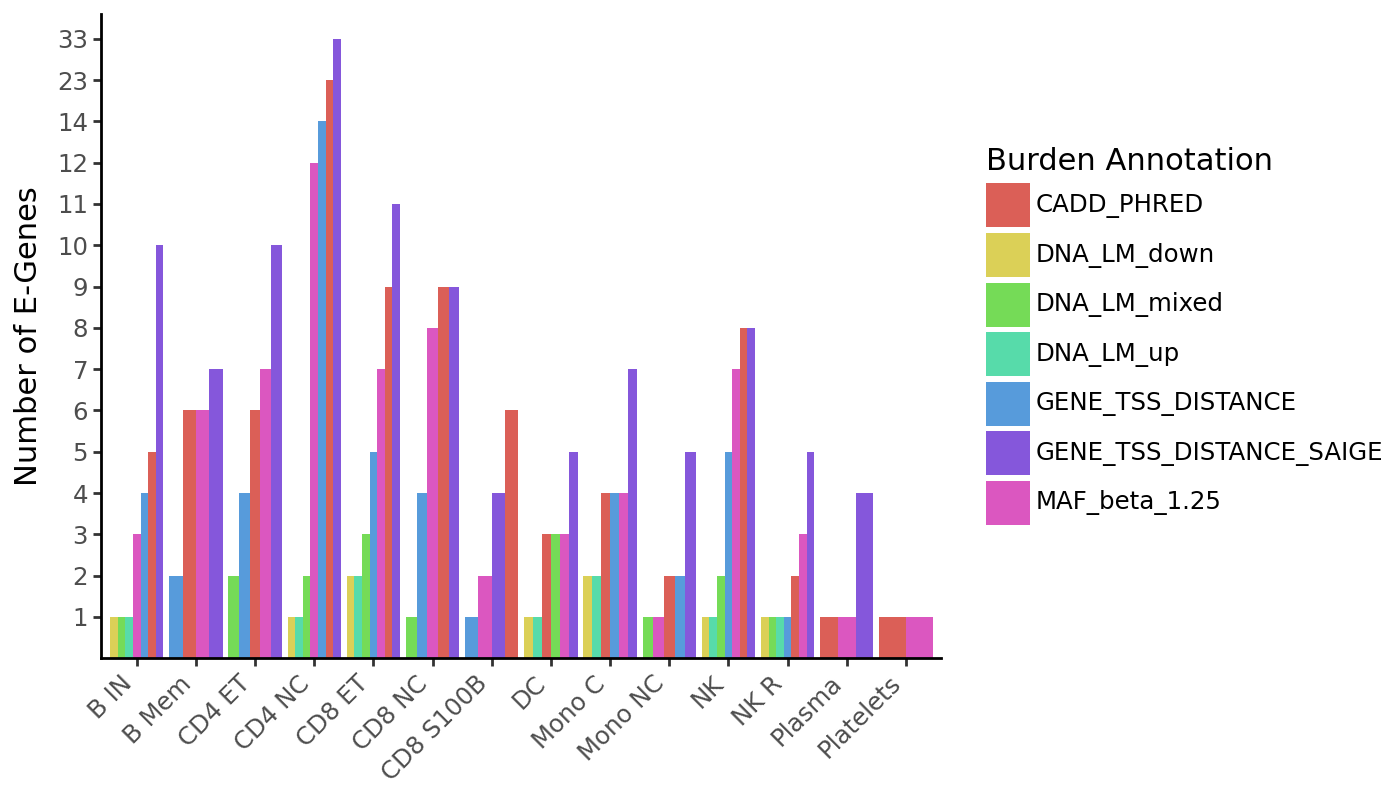

In [22]:
plot_egenes(df_to_plot_6)

[2025-01-28 09:09:36,295] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


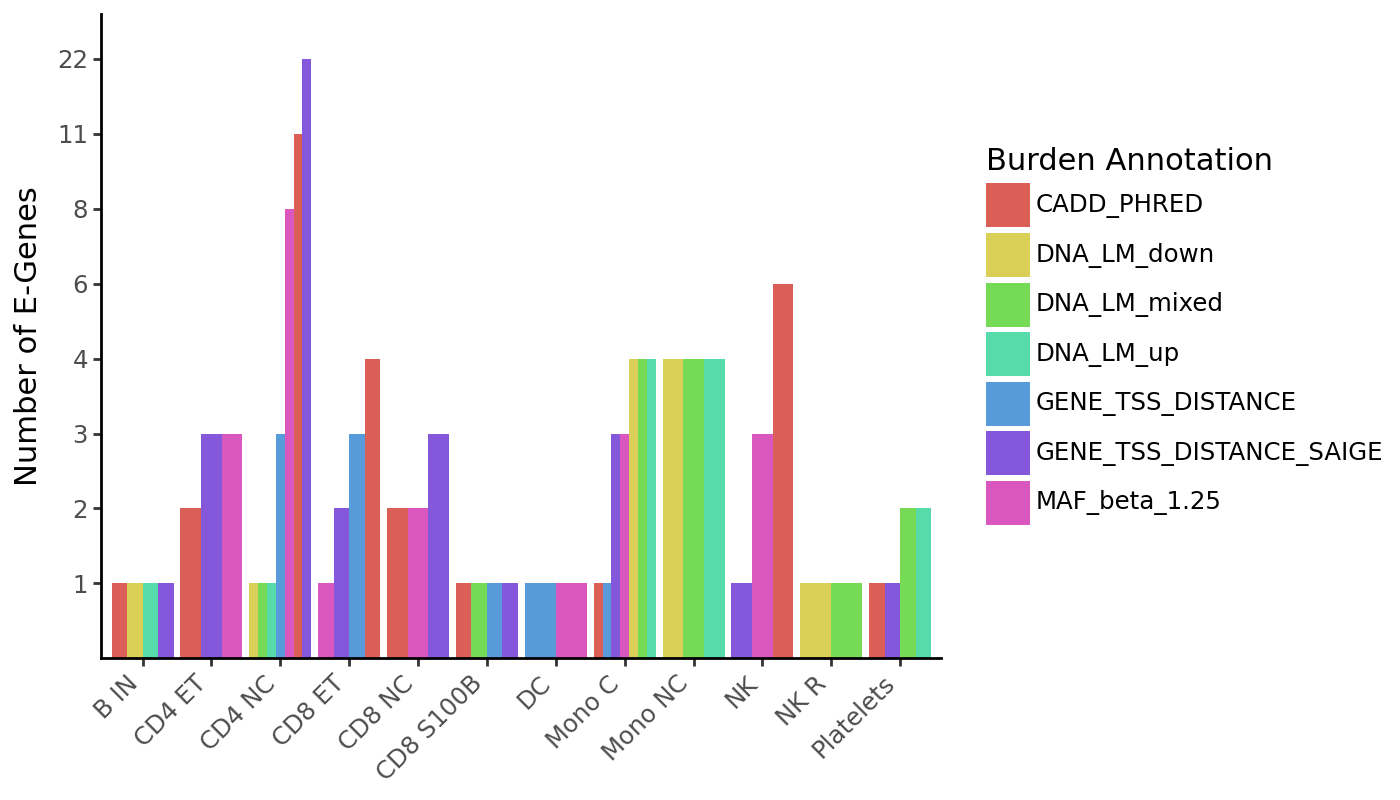

In [23]:
plot_egenes(df_to_plot_7)

[2025-01-28 09:09:36,514] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


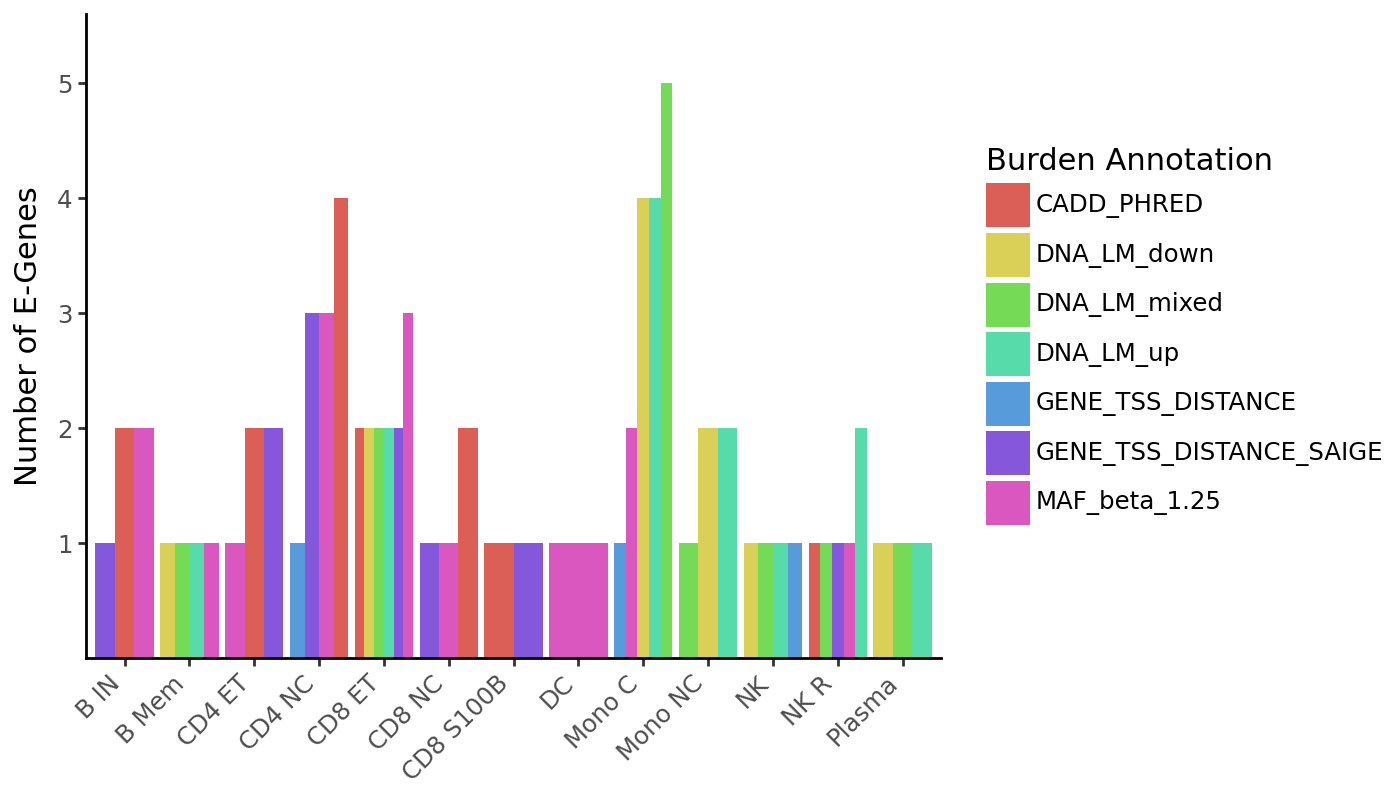

In [24]:
plot_egenes(df_to_plot_8)

[2025-01-28 09:09:36,726] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


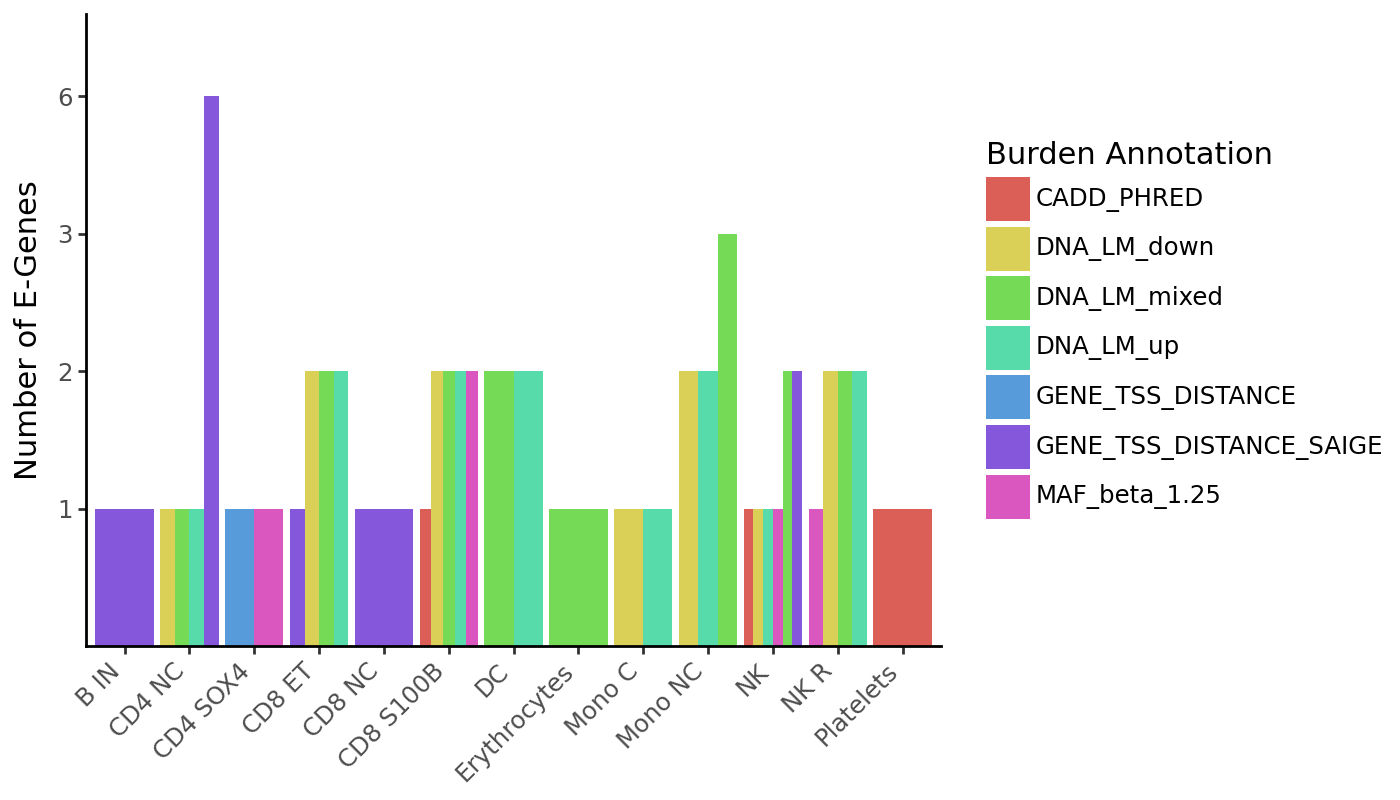

In [25]:
plot_egenes(df_to_plot_9)

[2025-01-28 09:09:36,924] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


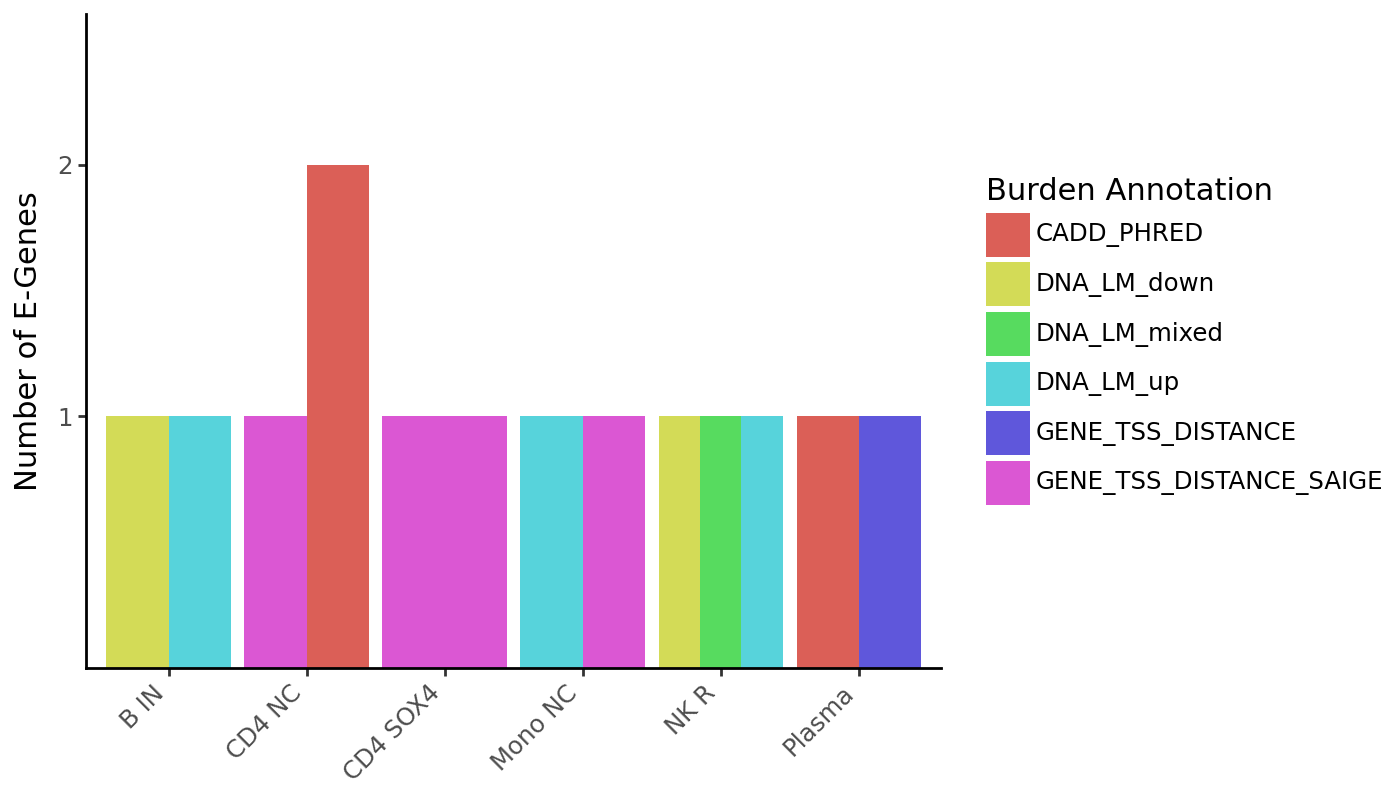

In [26]:
plot_egenes(df_to_plot_10)

[2025-01-28 09:09:37,118] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


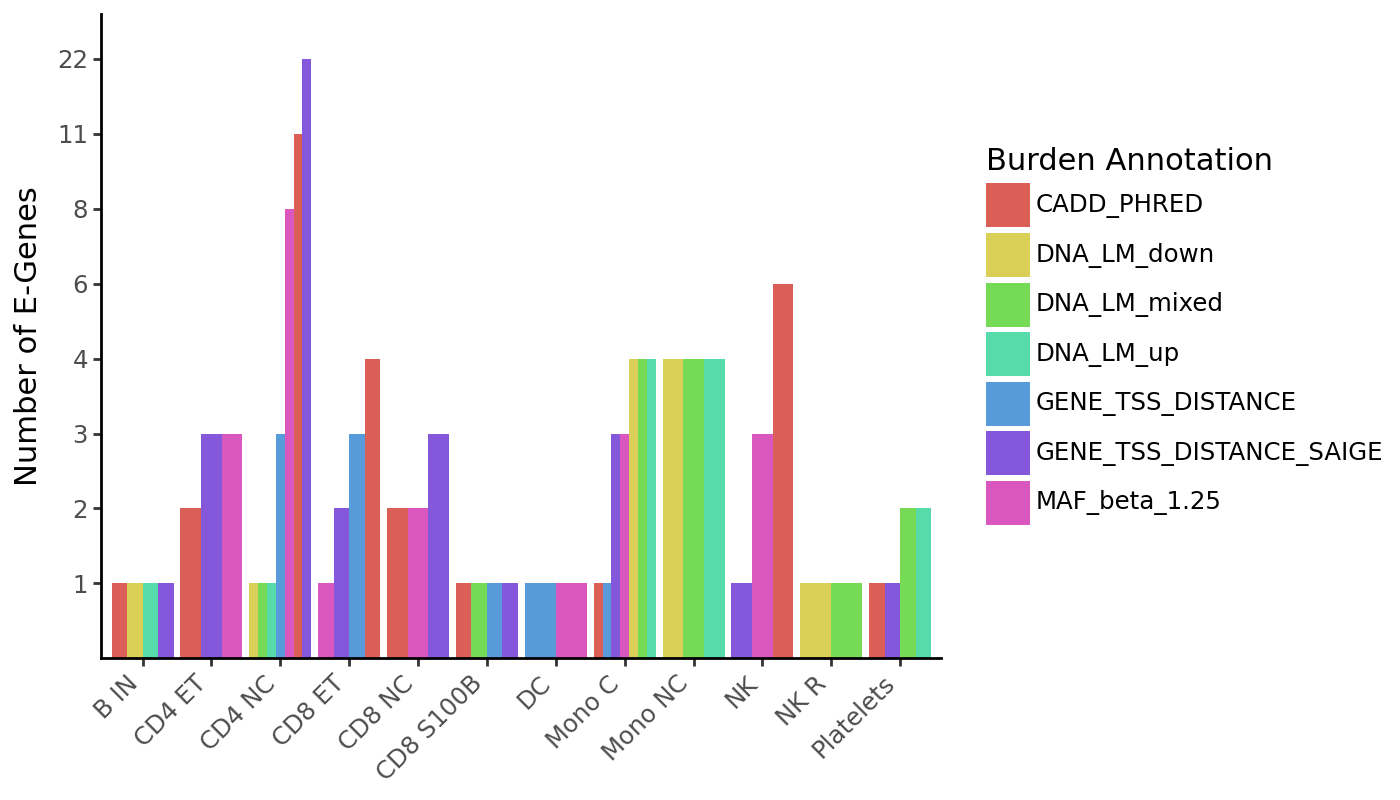

In [27]:
plot_egenes(df_to_plot_7)

[2025-01-28 09:09:37,351] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


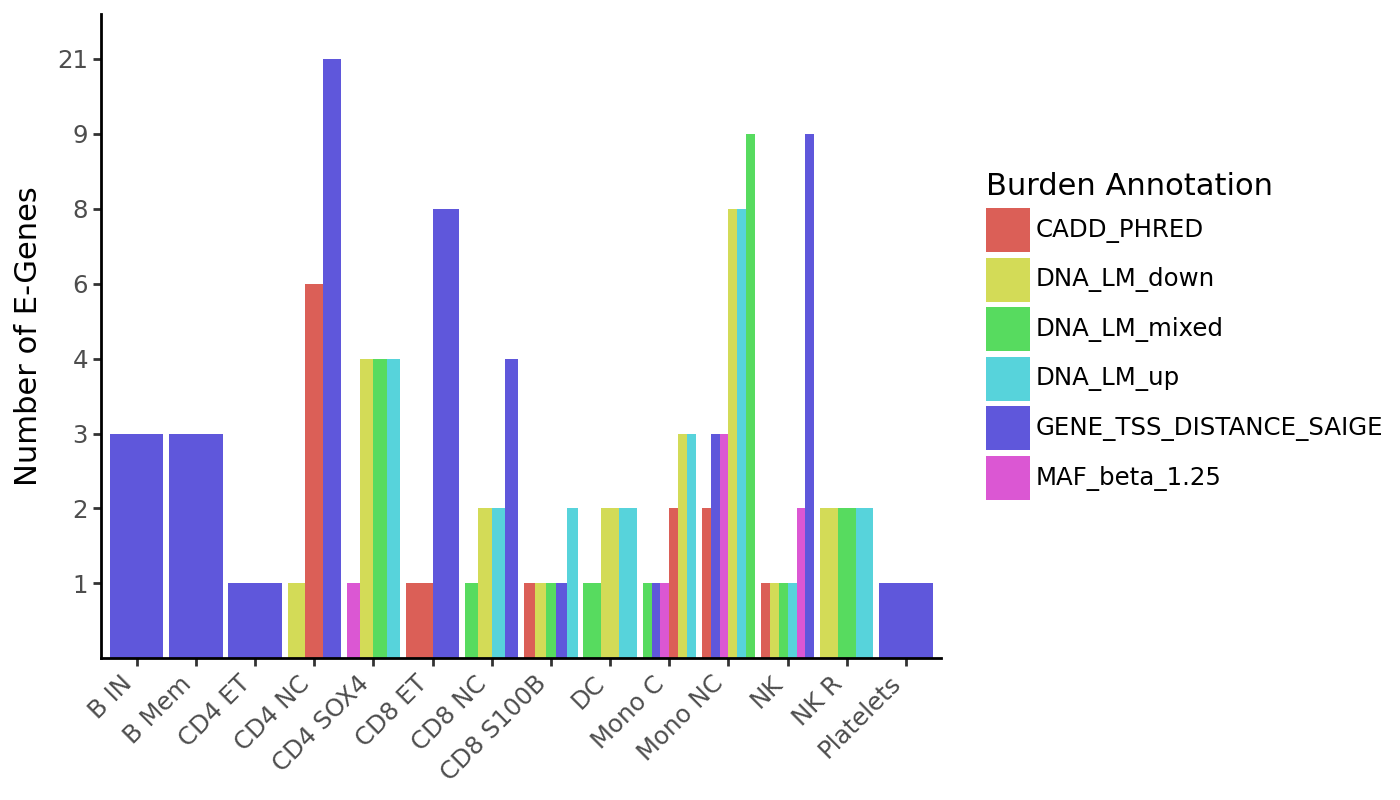

In [28]:
plot_egenes(df_to_plot_11)

[2025-01-28 09:09:37,569] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


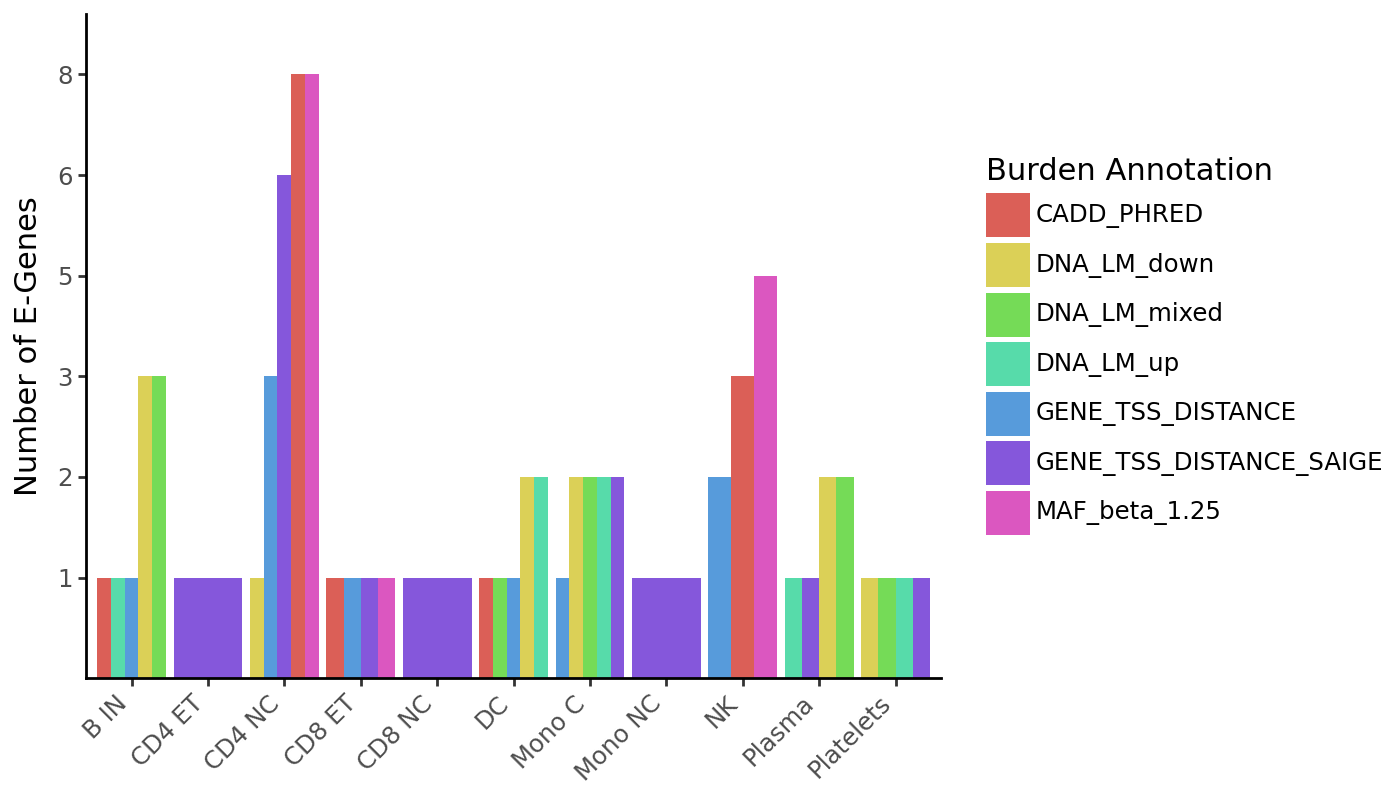

In [29]:
plot_egenes(df_to_plot_12)

In [158]:
df_final_13[df_final_13["significant"]]

burden_gene      target_gene              burden_type        pvalue  \
5  ENSG00000169062  ENSG00000169062        GENE_TSS_DISTANCE  1.421554e-04   
6  ENSG00000185896  ENSG00000185896  GENE_TSS_DISTANCE_SAIGE  1.481375e-04   
0  ENSG00000151773  ENSG00000151773               CADD_PHRED  1.424639e-04   
0  ENSG00000228889  ENSG00000228889               CADD_PHRED  2.915317e-04   
1  ENSG00000132958  ENSG00000132958                DNA_LM_up  1.160323e-12   
2  ENSG00000132958  ENSG00000132958              DNA_LM_down  4.692969e-13   
3  ENSG00000132958  ENSG00000132958            MAF_beta_1.25  1.442321e-07   
3  ENSG00000236778  ENSG00000236778            MAF_beta_1.25  5.614337e-04   
3  ENSG00000228889  ENSG00000228889            MAF_beta_1.25  4.045225e-05   
4  ENSG00000132958  ENSG00000132958             DNA_LM_mixed  1.346178e-11   
4  ENSG00000134864  ENSG00000134864             DNA_LM_mixed  2.509035e-04   
5  ENSG00000132958  ENSG00000132958        GENE_TSS_DISTANCE  3.096292e-10   
5  ENSG00000151773  ENSG00000151773        GENE_TSS_DISTANCE  5.529358e-04   
5  ENSG00000136100  ENSG00000136100        GENE_TSS_DISTANCE  5.895925e-04   
5  ENSG00000169062  ENSG00000169062        GENE_TSS_DISTANCE  2.226622e-08   
1  ENSG00000139496  ENSG00000139496                DNA_LM_up  5.585350e-05   
1  ENSG00000152749  ENSG00000152749                DNA_LM_up  7.341834e-06   
2  ENSG00000139496  ENSG00000139496              DNA_LM_down  8.737476e-05   
2  ENSG00000152749  ENSG00000152749              DNA_LM_down  5.224531e-06   
4  ENSG00000139496  ENSG00000139496             DNA_LM_mixed  9.556272e-06   
4  ENSG00000152749  ENSG00000152749             DNA_LM_mixed  1.750213e-05   
1  ENSG00000172915  ENSG00000172915                DNA_LM_up  1.318740e-05   
2  ENSG00000172915  ENSG00000172915              DNA_LM_down  3.292122e-05   
4  ENSG00000172915  ENSG00000172915             DNA_LM_mixed  5.097234e-05   
1  ENSG00000151835  ENSG00000151835                DNA_LM_up  4.944522e-04   
1  ENSG00000185989  ENSG00000185989                DNA_LM_up  4.858219e-04   
4  ENSG00000185989  ENSG00000185989             DNA_LM_mixed  1.315585e-04   
6  ENSG00000198824  ENSG00000198824  GENE_TSS_DISTANCE_SAIGE  5.608396e-06   
1  ENSG00000132953  ENSG00000132953                DNA_LM_up  3.776457e-10   
2  ENSG00000132953  ENSG00000132953              DNA_LM_down  5.120612e-10   
3  ENSG00000132953  ENSG00000132953            MAF_beta_1.25  3.749256e-06   
4  ENSG00000132953  ENSG00000132953             DNA_LM_mixed  7.195741e-10   
5  ENSG00000132953  ENSG00000132953        GENE_TSS_DISTANCE  4.372726e-06   
4  ENSG00000152749  ENSG00000152749             DNA_LM_mixed  2.328228e-04   
6  ENSG00000130177  ENSG00000130177  GENE_TSS_DISTANCE_SAIGE  9.568986e-07   
1  ENSG00000150401  ENSG00000150401                DNA_LM_up  5.218786e-06   
2  ENSG00000150401  ENSG00000150401              DNA_LM_down  1.186514e-05   
4  ENSG00000150401  ENSG00000150401             DNA_LM_mixed  3.101747e-06   
5  ENSG00000247400  ENSG00000247400        GENE_TSS_DISTANCE  1.639576e-04   
6  ENSG00000150401  ENSG00000150401  GENE_TSS_DISTANCE_SAIGE  7.541601e-07   
1  ENSG00000231856  ENSG00000231856                DNA_LM_up  6.401500e-05   
2  ENSG00000231856  ENSG00000231856              DNA_LM_down  4.612055e-05   
2  ENSG00000125249  ENSG00000125249              DNA_LM_down  4.597070e-04   
4  ENSG00000231856  ENSG00000231856             DNA_LM_mixed  3.476206e-05   

       beta  cell_type chromosome  significant  FDR_corrected  \
5  0.056083     CD8 ET         13         True   3.298006e-02   
6 -0.060308     CD8 NC         13         True   3.451603e-02   
0 -0.008029     CD4 NC         13         True   3.704061e-02   
0  0.005136     CD4 NC         13         True   3.789913e-02   
1  0.003204     CD4 NC         13         True   3.016841e-10   
2  0.003256     CD4 NC         13         True   1.220172e-10   
3  0.002388     CD4 NC         13        

[2025-01-28 09:09:37,777] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


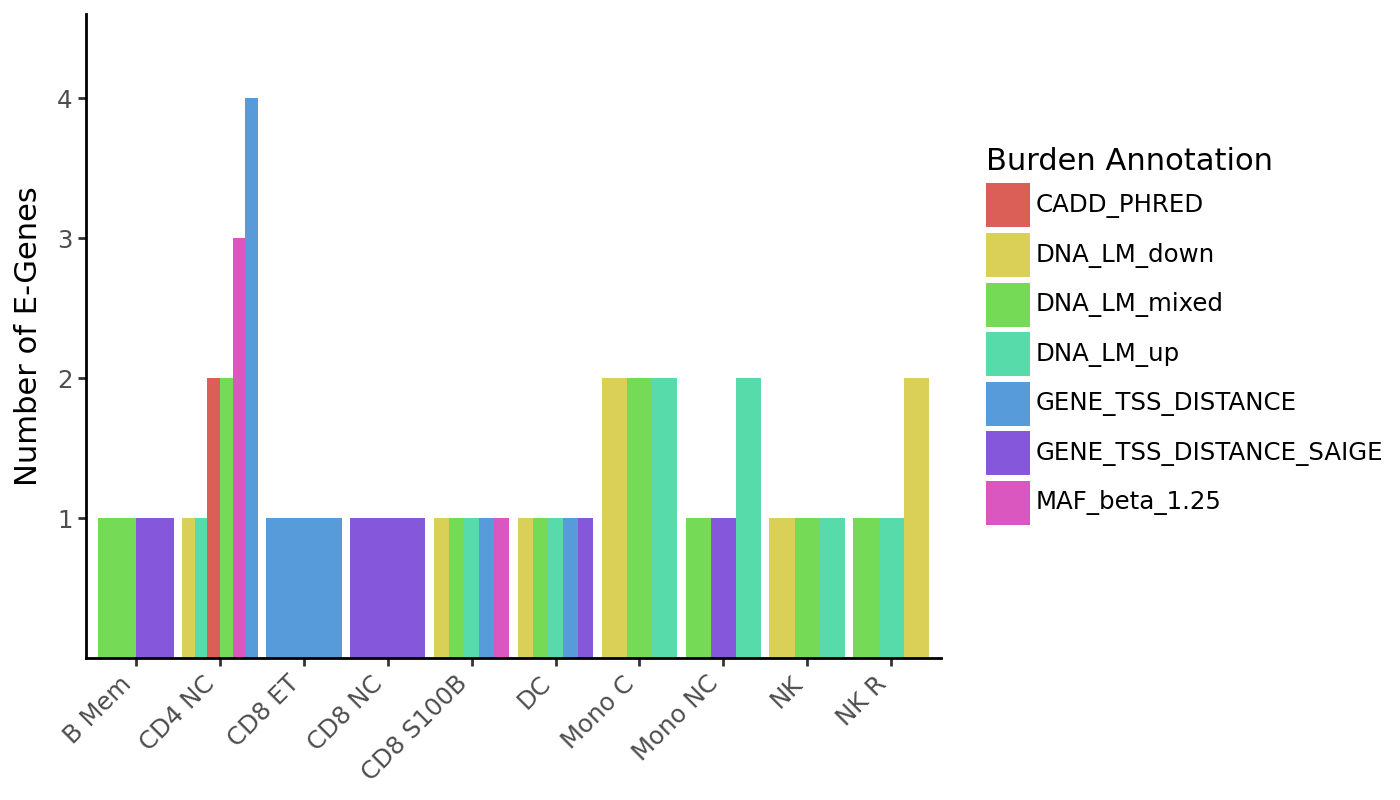

In [30]:
plot_egenes(df_to_plot_13)

## OLD Heatmap for egene expression


In [54]:
def prepare_df(df, chromosome):
    df = df.copy()  
    df['chromosome'] = chromosome  
    return df

In [55]:
def create_chromosome_heatmap(df_list):
    """
    Parameters:
        df_list: list of pd.DataFrame

    Returns:
        None
    """
    combined_df = pd.concat(df_list, ignore_index=True)

    heatmap_data = combined_df.pivot_table(
        index='chromosome', 
        columns='annotation', 
        values='n', 
        aggfunc='sum', 
        fill_value=0 
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data, 
        annot=True,  
        fmt="d",  
        cmap="Blues",  
        cbar_kws={'label': 'Number of E-Genes'}  
    )
    plt.title("Heatmap of E-Genes per Annotation and Chromosome")
    plt.xlabel("Burden Annotation")
    plt.ylabel("Chromosome")
    plt.tight_layout()
    plt.show()

In [60]:
df_6 = prepare_df(df_to_plot_6, chromosome = 6)
df_7 = prepare_df(df_to_plot_7, chromosome = 7)
df_8 = prepare_df(df_to_plot_8, chromosome = 8)
df_9 = prepare_df(df_to_plot_9, chromosome = 9)
df_10 = prepare_df(df_to_plot_10, chromosome = 10)
df_11 = prepare_df(df_to_plot_11, chromosome = 11)
df_12 = prepare_df(df_to_plot_12, chromosome = 12)
df_13 = prepare_df(df_to_plot_13, chromosome = 13)
df_list = [df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13]

/scratch/tmp/l_pock/ipykernel_865875/2643013643.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


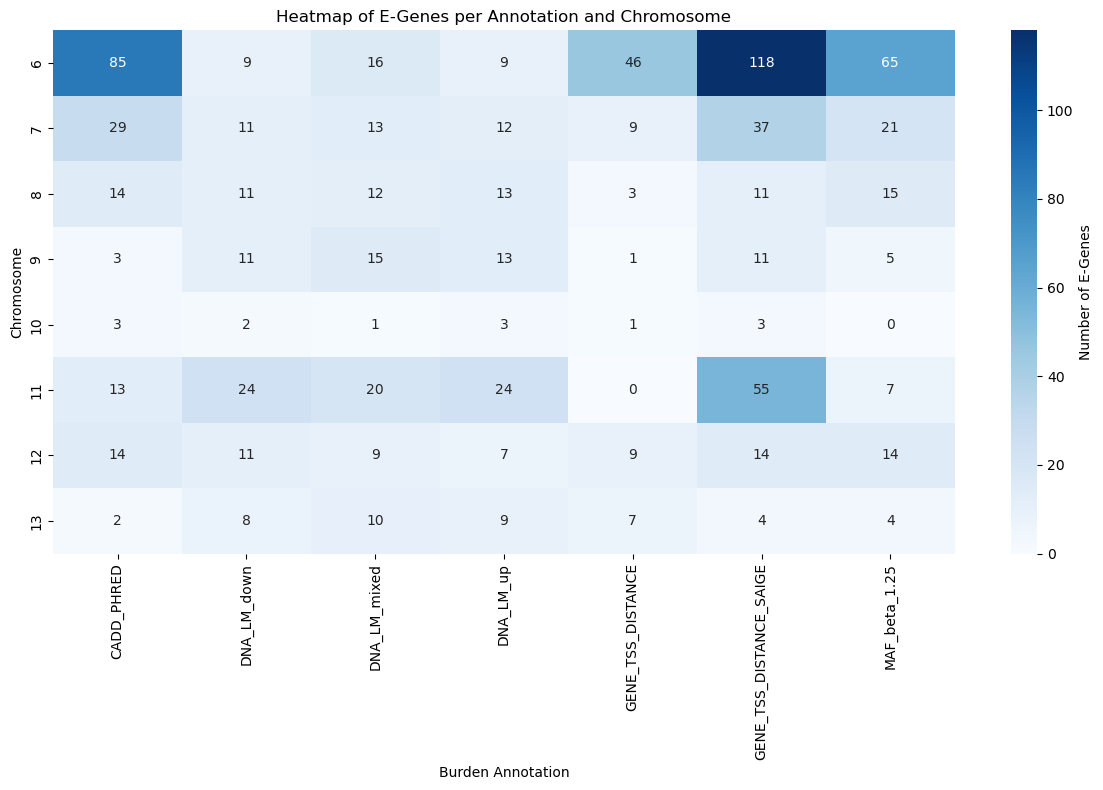

In [61]:
create_chromosome_heatmap(df_list)

## Boxplots for beta distribution

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
def grouped_boxplot(df):
    
    sorted_df = df.sort_values(by=['cell_type', 'burden_type'])
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=sorted_df, x='cell_type', y='beta', hue='burden_type')
     
    #plt.title('Distribution of Beta Values for Cell Type and Burden Type')
    plt.ylabel('Beta Values', fontsize = 16)
    
    plt.xticks(rotation=45, fontsize=14)
    

    plt.yticks(fontsize=14)
    
    
    plt.legend(title='Burden Annotation',title_fontsize=16, fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/beta_distribution.png")
    plt.show()

In [27]:
def calculate_std(df):
    
    std_df = df.groupby(['cell_type', 'burden_gene'])['beta'].std().reset_index(name='std_beta')
    
    df = df.merge(std_df, on=['cell_type', 'burden_gene'])
    
    return df

In [36]:
filtered_results = all_results[all_results['significant']]
#filtered_results = all_results[(all_results["cell_type"] != "Erythrocytes") & (all_results["cell_type"] != "Platelets") & all_results['significant']]

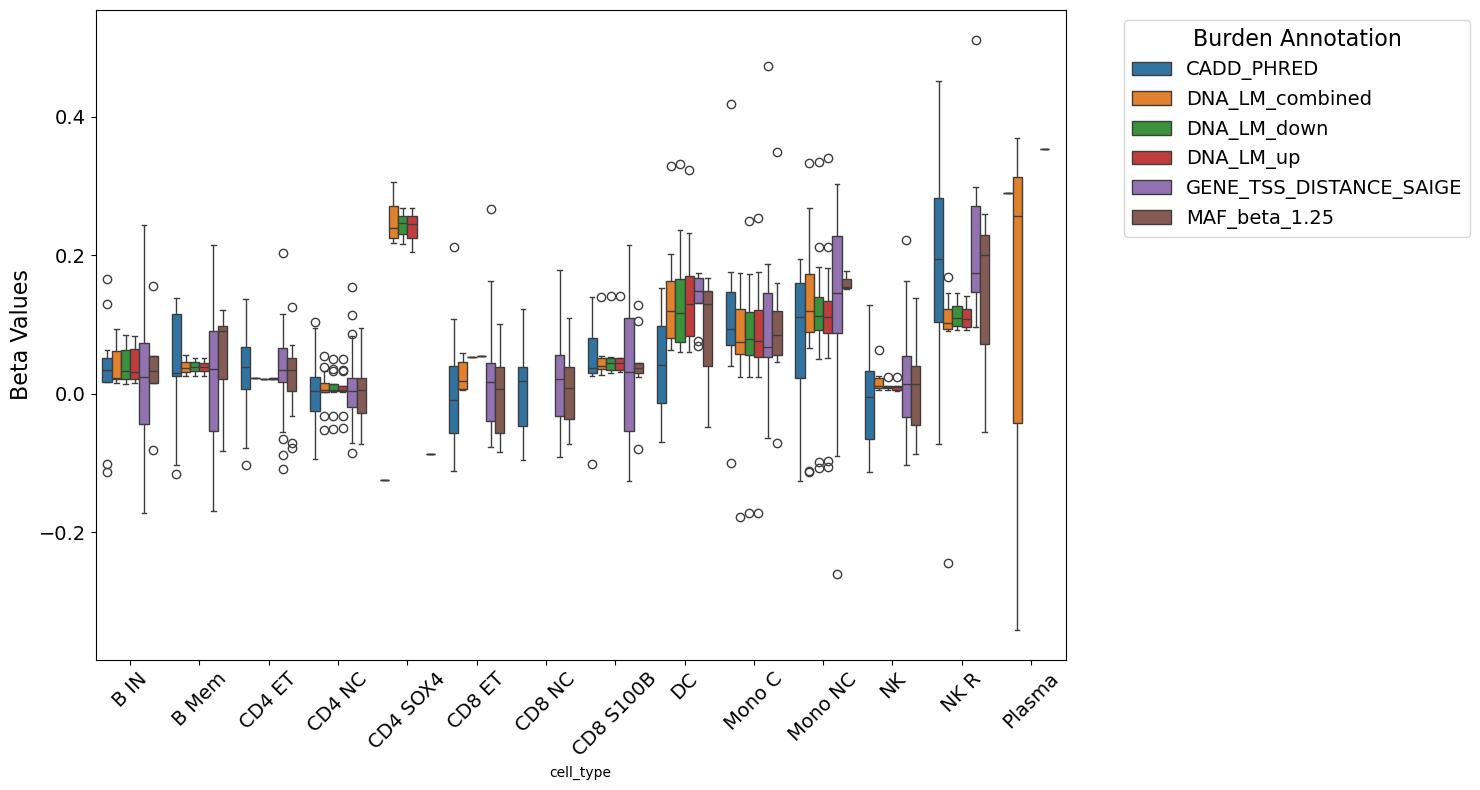

In [37]:
grouped_boxplot(filtered_results)

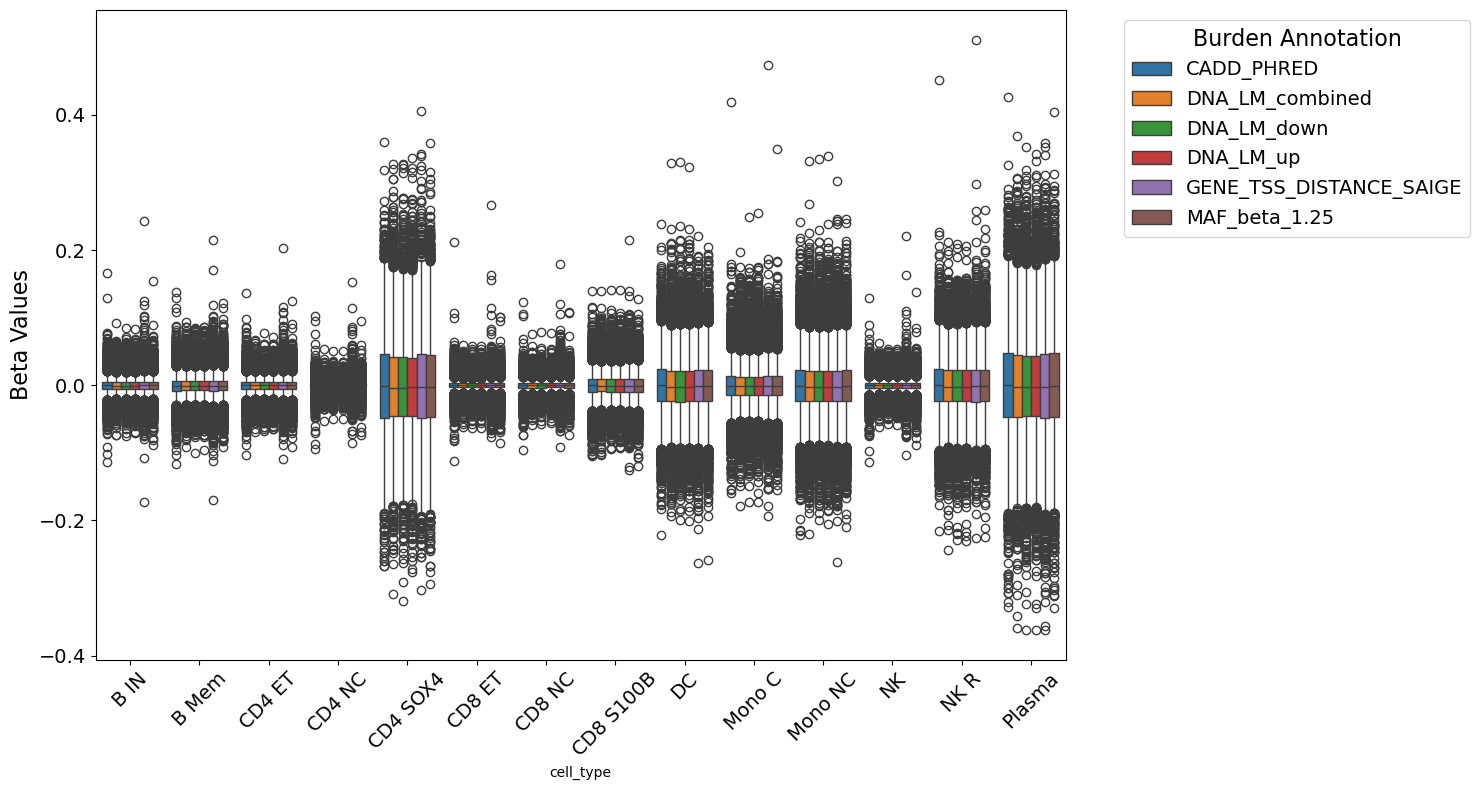

In [33]:
grouped_boxplot(all_results)

In [38]:
calc_sd = calculate_std(filtered_results)

In [29]:
calc_sd[(calc_sd['cell_type'] == "NK R") & (calc_sd['burden_type'] == "GENE_TSS_DISTANCE_SAIGE")]


Unnamed: 0      burden_gene      target_gene              burden_type  \
1313      821305  ENSG00000142864  ENSG00000142864  GENE_TSS_DISTANCE_SAIGE   
1314      823222  ENSG00000124575  ENSG00000124575  GENE_TSS_DISTANCE_SAIGE   
1315      823259  ENSG00000234745  ENSG00000234745  GENE_TSS_DISTANCE_SAIGE   
1316      823328  ENSG00000124614  ENSG00000124614  GENE_TSS_DISTANCE_SAIGE   
1317      823338  ENSG00000096063  ENSG00000096063  GENE_TSS_DISTANCE_SAIGE   
1318      823948  ENSG00000036448  ENSG00000036448  GENE_TSS_DISTANCE_SAIGE   
1319      828538  ENSG00000093000  ENSG00000093000  GENE_TSS_DISTANCE_SAIGE   

            pvalue      beta cell_type  chromosome  significant  \
1313  3.713170e-05  0.243804      NK R           1         True   
1314  1.541461e-05  0.096576      NK R           6         True   
1315  2.491142e-05  0.122977      NK R           6         True   
1316  2.467107e-11  0.298358      NK R           6         True   
1317  1.425510e-06  0.174177      NK R           6         True   
1318  7.877545e-43  0.511420      NK R           8         True   
1319  3.955342e-05  0.170272      NK R          22         True   

      FDR_corrected           celltype-annotation  std_beta  
1313   4.236171e-02  NK R-GENE_TSS_DISTANCE_SAIGE       NaN  
1314   2.889084e-02  NK R-GENE_TSS_DISTANCE_SAIGE       NaN  
1315   3.735219e-02  NK R-GENE_TSS_DISTANCE_SAIGE       NaN  
1316   9.247949e-08  NK R-GENE_TSS_DISTANCE_SAIGE  0.051169  
1317   3.562349e-03  NK R-GENE_TSS_DISTANCE_SAIGE       NaN  
1318   5.905795e-39  NK R-GENE_TSS_DISTANCE_SAIGE  0.131739  
1319   4.236171e-02  NK R-GENE_TSS_DISTANCE_SAIGE       NaN

In [32]:
calc_sd[(calc_sd['cell_type'] == "NK R") & (calc_sd['burden_type'] == "MAF_beta_1.25")]

Unnamed: 0      burden_gene      target_gene    burden_type  \
1296      807785  ENSG00000145425  ENSG00000145425  MAF_beta_1.25   
1297      808334  ENSG00000124614  ENSG00000124614  MAF_beta_1.25   
1298      808954  ENSG00000036448  ENSG00000036448  MAF_beta_1.25   

            pvalue      beta cell_type  chromosome  significant  \
1296  5.325576e-06 -0.055864      NK R           4         True   
1297  9.838883e-06  0.199483      NK R           6         True   
1298  1.375518e-11  0.259466      NK R           8         True   

      FDR_corrected celltype-annotation  std_beta  
1296   1.996292e-02  NK R-MAF_beta_1.25  0.012321  
1297   2.458737e-02  NK R-MAF_beta_1.25  0.051169  
1298   1.031226e-07  NK R-MAF_beta_1.25  0.131739

In [40]:

def grouped_boxplot_sd(df):
    # Sortieren des DataFrame nach 'cell_type'
    sorted_df = df.sort_values(by=['cell_type', 'burden_type'])
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=sorted_df, x='cell_type', y='std_beta', hue='burden_type')
    
    #plt.title('Distribution of Standard Deviation of Beta Values for Cell Type and Burden Type')
    plt.ylabel('Standard Deviation of Beta Value', fontsize = 16)
    
    plt.xticks(rotation=45, fontsize= 14)
    plt.yticks(fontsize= 14)
    plt.legend(title='Burden Annotation', title_fontsize=16, fontsize = 14,bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    #plt.savefig("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/std_beta_distribution.png")
    plt.show()

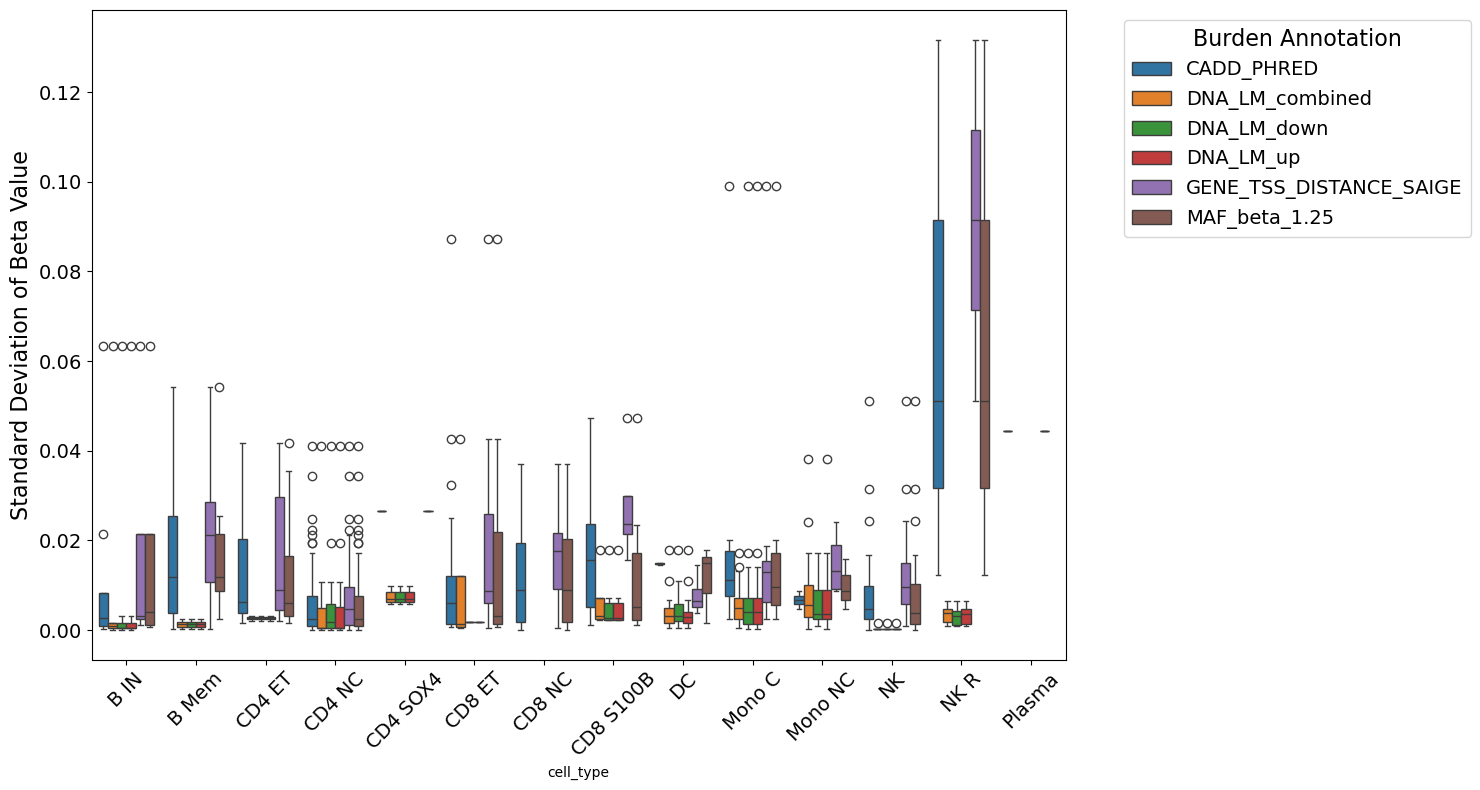

In [41]:
grouped_boxplot_sd(calc_sd)

## OLD Beta Value Plots

In [23]:
def plot_beta(df, burdentype):
    print(burdentype)
    plot = (
        ggplot(df, aes(x='cell_type', y='beta'))
        + geom_boxplot()
        + labs(title=f'beta values {burdentype}',
               x='celltype',
               y='beta values')
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
    )
    print(plot)


In [24]:
unique_burden_types = df_final_ET['burden_type'].unique()
unique_burden_types

NameError: name 'df_final_ET' is not defined

In [153]:
#boxplot for significant 
#for burdentype in unique_burden_types:
    #df_filtered = df_final_ET[(df_final_ET['burden_type'] == burdentype) & (df_final_ET['significant'])]
    #plot_beta(df_filtered, burdentype)
    
    

In [154]:
# boxplot for all
#for burdentype in unique_burden_types:
 #   df_filtered = df_final_ET[(df_final_ET['burden_type'] == burdentype) ]
  #  plot_beta(df_filtered, burdentype)

In [130]:
grouped = filtered_results.groupby(['burden_gene', 'cell_type']).agg(
    mean_beta=('beta', 'mean'),
    std_beta=('beta', 'std'),
    count=('beta', 'size')  # Zählt die Anzahl der 'beta'-Werte pro Gruppe
).reset_index()

# Schritt 2: Filtern der Gruppen, die mehr als einen Eintrag haben
filtered_grouped = grouped[grouped['count'] > 1]
filtered_grouped = filtered_grouped[filtered_grouped['mean_beta'] >0.01]
filtered_grouped_neg = filtered_grouped[filtered_grouped['mean_beta'] < (-0.01)]

# Optional: Entfernen der 'count'-Spalte, wenn sie nicht mehr benötigt wird
#filtered_grouped = filtered_grouped.drop(columns=['count'])

In [140]:
def grouped_boxplot_sd_old(df):
    # Berechnen der Standardabweichung für jede Kombination aus 'cell_type' und 'burden_type'
    std_df = df.groupby(['cell_type', 'burden_type'])['beta'].std().reset_index()
    std_df.rename(columns={'beta': 'std_beta'}, inplace=True)

    # Sortieren des DataFrames für eine bessere Visualisierung
    sorted_std_df = std_df.sort_values(by='cell_type')

    # Erstellen des Boxplots
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=sorted_std_df, x='cell_type', y='std_beta', hue='burden_type', palette='Set3')
     
    plt.title('Standard Deviation of Beta Values for Each Celltype and Burdentype')
    plt.xlabel('Cell Type')
    plt.ylabel('Standard Deviation of Beta Values')
    
    plt.xticks(rotation=45)
    plt.legend(title='Burden Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.ylim(0, 0.25)

    # Speichern des Plots
    plt.savefig("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/std_beta_distribution.png")
    plt.show()

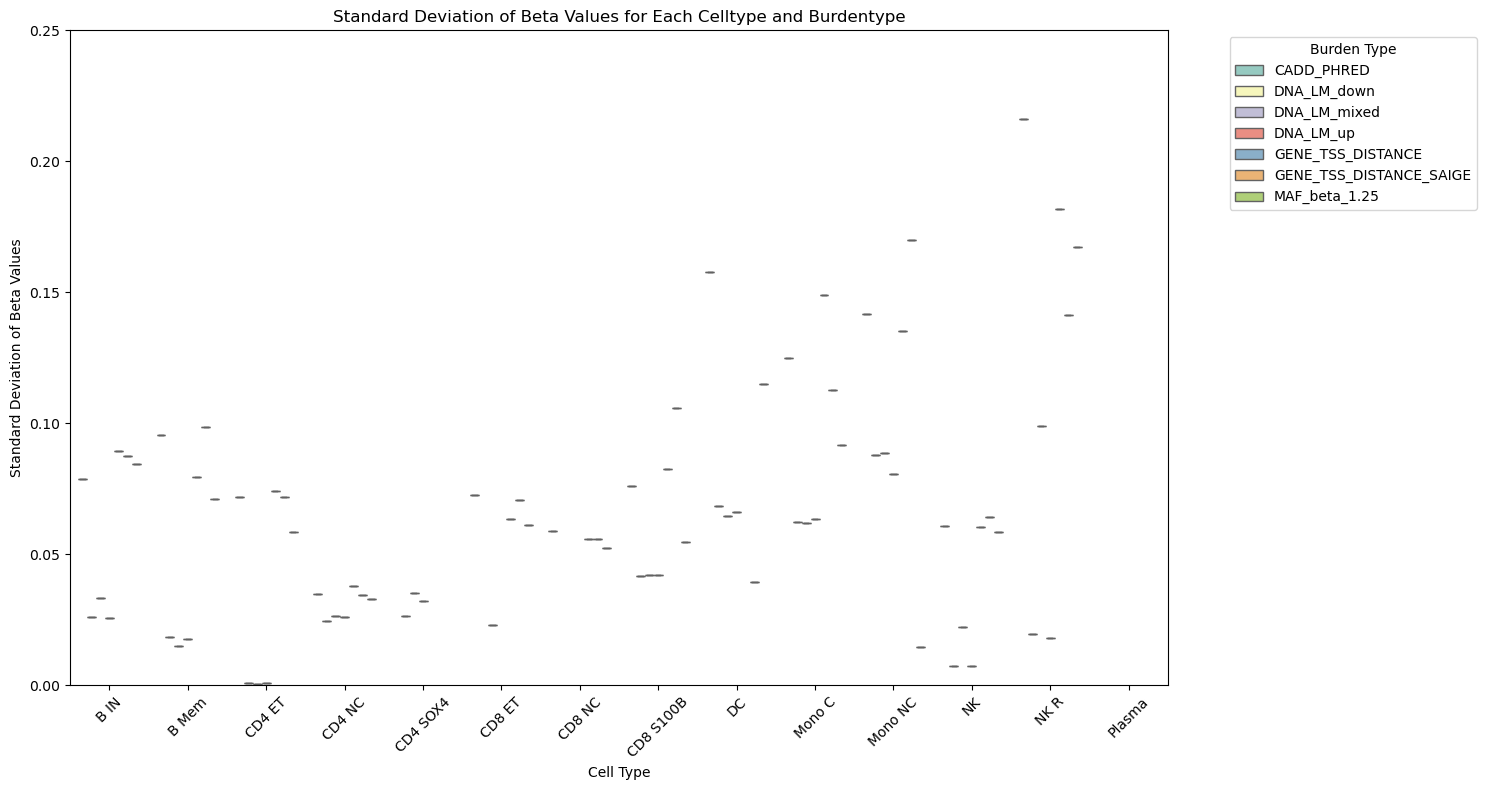

In [141]:
grouped_boxplot_sd(filtered_results)

In [143]:
std_df = filtered_results.groupby(['cell_type', 'burden_type'])['beta'].std().reset_index()
std_df.rename(columns={'beta': 'std_beta'}, inplace=True)
std_df

cell_type              burden_type  std_beta
0       B IN               CADD_PHRED  0.078784
1       B IN              DNA_LM_down  0.025976
2       B IN             DNA_LM_mixed  0.033364
3       B IN                DNA_LM_up  0.025704
4       B IN        GENE_TSS_DISTANCE  0.089262
..       ...                      ...       ...
85      NK R  GENE_TSS_DISTANCE_SAIGE  0.141416
86      NK R            MAF_beta_1.25  0.167448
87    Plasma               CADD_PHRED       NaN
88    Plasma             DNA_LM_mixed  0.381612
89    Plasma  GENE_TSS_DISTANCE_SAIGE       NaN

[90 rows x 3 columns]

In [125]:
print(filtered_grouped[filtered_grouped['burden_gene'] == 'ENSG00000013523'])

        burden_gene cell_type  mean_beta  std_beta  count
11  ENSG00000013523    Mono C   0.043532  0.000888      3


In [123]:
def plot_mean_beta_with_std(df):
    plt.figure(figsize=(20, 8))

    barplot = sns.barplot(x='burden_gene', y='mean_beta', hue='cell_type', data=df, palette='viridis', capsize=.1, dodge= True)
    

    plt.title('Durchschnittliche Beta-Werte mit Standardabweichung pro Zelltyp und Gen')
    plt.xlabel('Gene')
    plt.ylabel('Durchschnittlicher Beta-Wert')
    plt.legend(title='Zelltyp')


    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

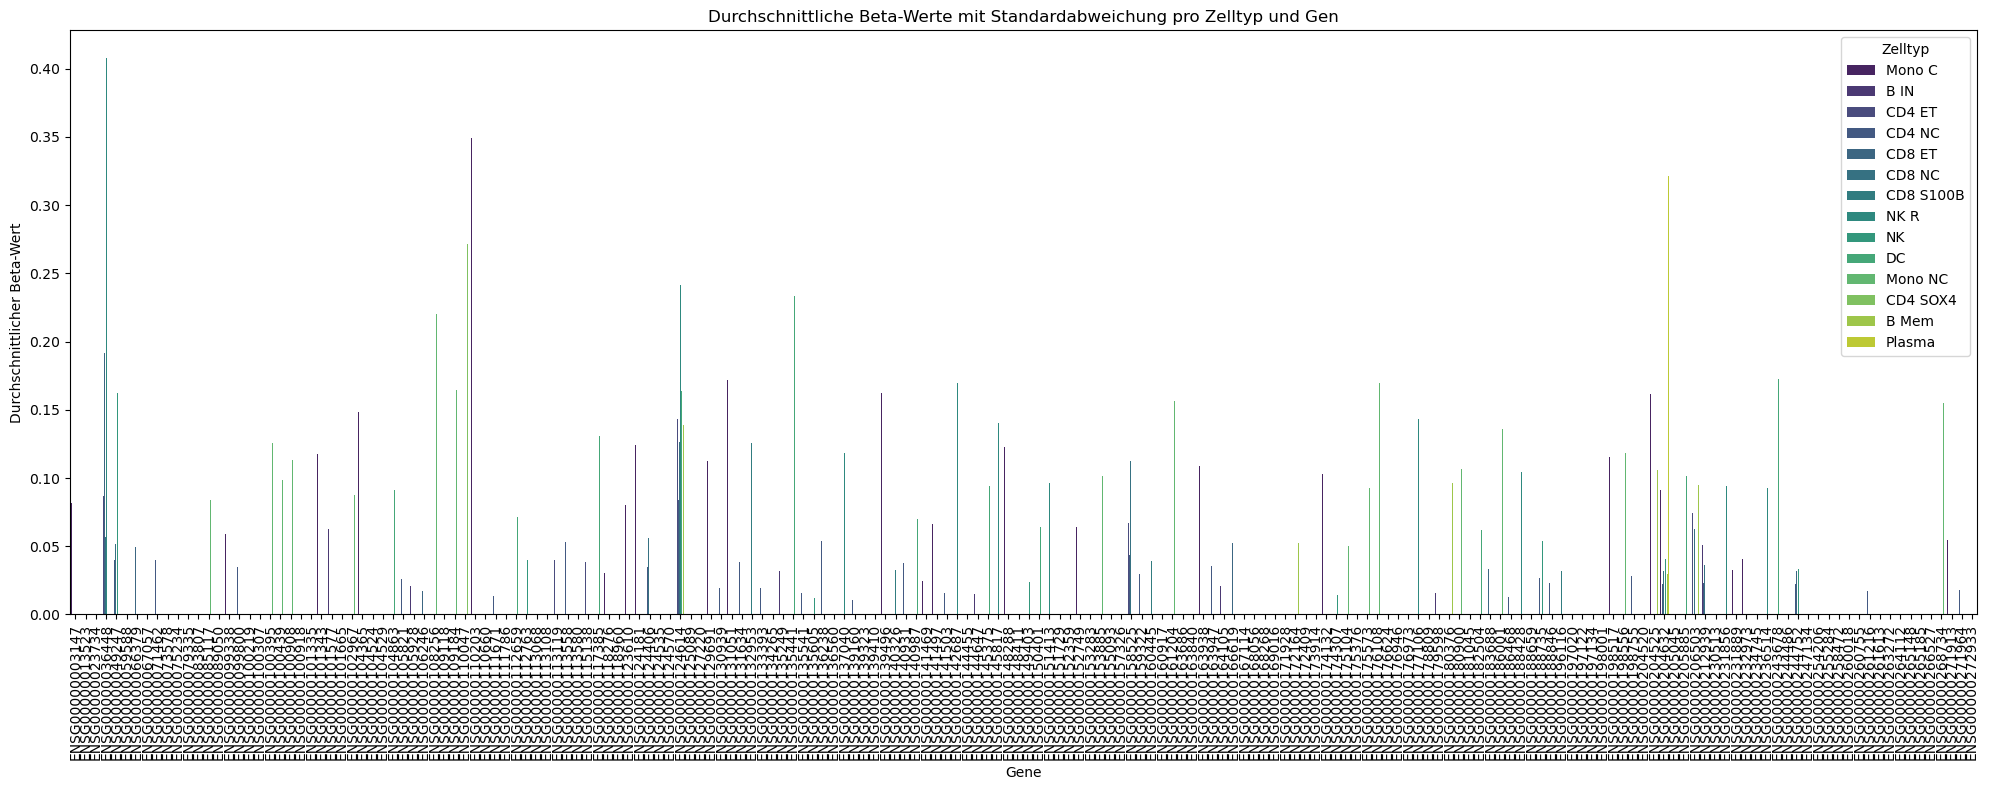

In [124]:
plot_mean_beta_with_std(filtered_grouped)

In [53]:
def aggregated_variability_heatmap(df):
    # standard deviations
    aggregated_variability = df.groupby(['burden_gene', 'cell_type'])['beta'].std().reset_index()
    aggregated_variability.columns = ['burden_gene', 'cell_type', 'std_beta']
    print(len( aggregated_variability))
    heatmap_data = aggregated_variability.pivot_table(
        index='cell_type', 
        columns='burden_gene', 
        values='std_beta', 
        fill_value=np.nan
    )
    
    plt.figure(figsize=(50, 15))
    ax = sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        cbar_kws={'label': 'Aggregated Beta Variability'},
        linewidths=0.5,
        linecolor='gray'
        
    )
    for text in ax.texts:
        text.set_rotation(90)
        
    plt.title("Heatmap of Beta Variability Across Burden-Types")
    plt.xlabel("Celltype Annotation")
    plt.ylabel("Gene")
    plt.tight_layout()
    #plt.savefig("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/beta_distribution_variability.png")
    plt.show()

792


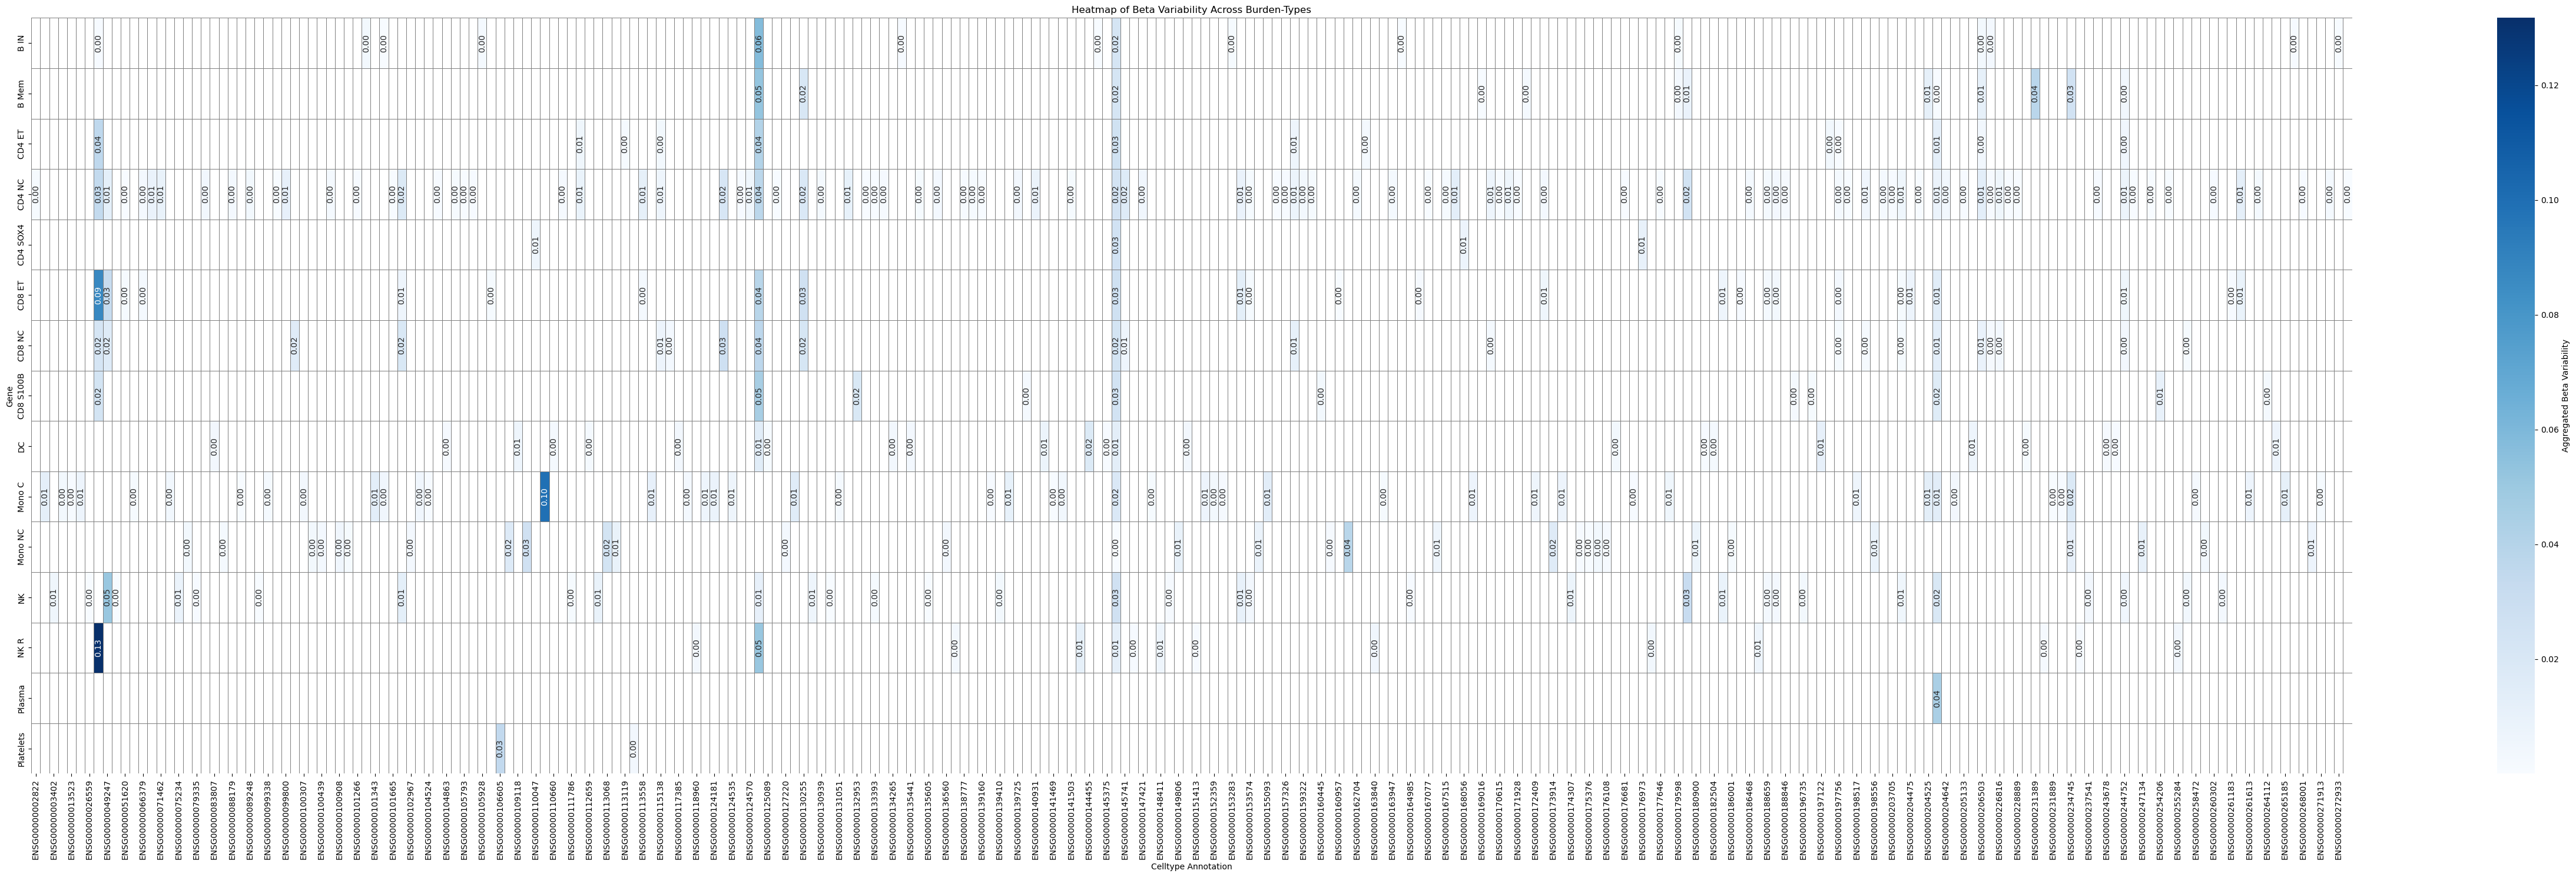

In [54]:
aggregated_variability_heatmap(all_results[all_results['significant']])


In [76]:
def aggregated_mean_heatmap(df):
    # standard deviations
    aggregated_variability = df.groupby(['burden_gene', 'cell_type'])['beta'].mean().reset_index()
    aggregated_variability.columns = ['burden_gene', 'cell_type', 'avg_beta']
    
    heatmap_data = aggregated_variability.pivot_table(
        index='cell_type', 
        columns='burden_gene', 
        values='avg_beta', 
        fill_value=np.nan
    )
    
    plt.figure(figsize=(50, 15))
    ax = sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        cbar_kws={'label': 'Aggregated Average Beta '}
        
    )
    for text in ax.texts:
        text.set_rotation(90)
        
    plt.title("Heatmap of Beta Variability Across Burden-Types")
    plt.xlabel("Celltype Annotation")
    plt.ylabel("Gene")
    plt.tight_layout()
    #plt.savefig("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/beta_distribution_variability.png")
    plt.show()

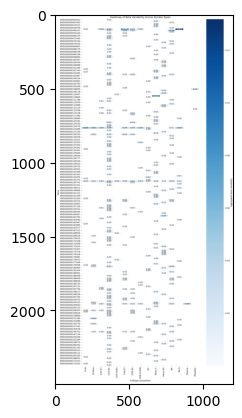

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimgimport matplotlib.pyplot as plt
img = mpimg.imread('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/beta_distribution_variability.png')  # Pfad zum Bild einsetzen

# Bild anzeigen
plt.imshow(img)

plt.show()

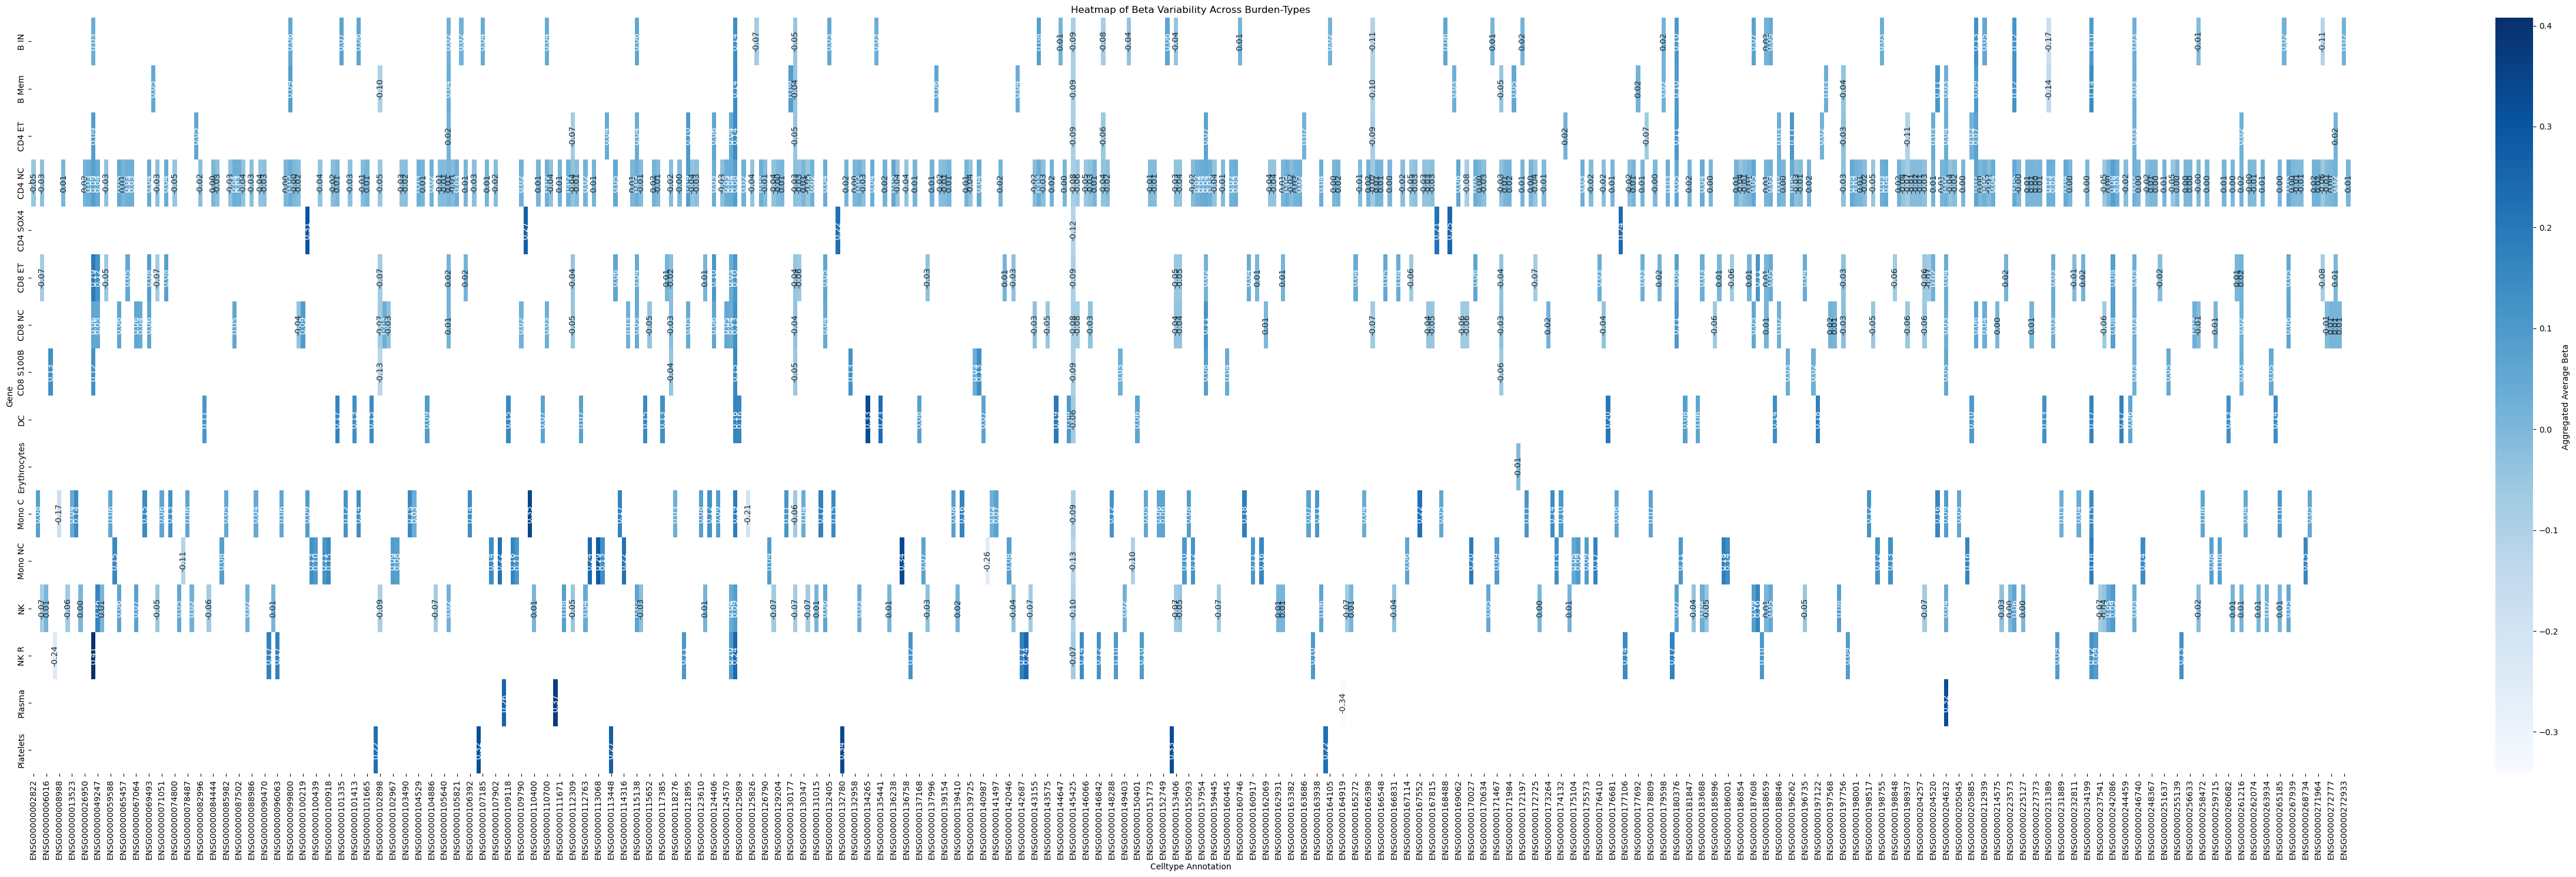

In [77]:
aggregated_mean_heatmap(all_results[all_results['significant']])

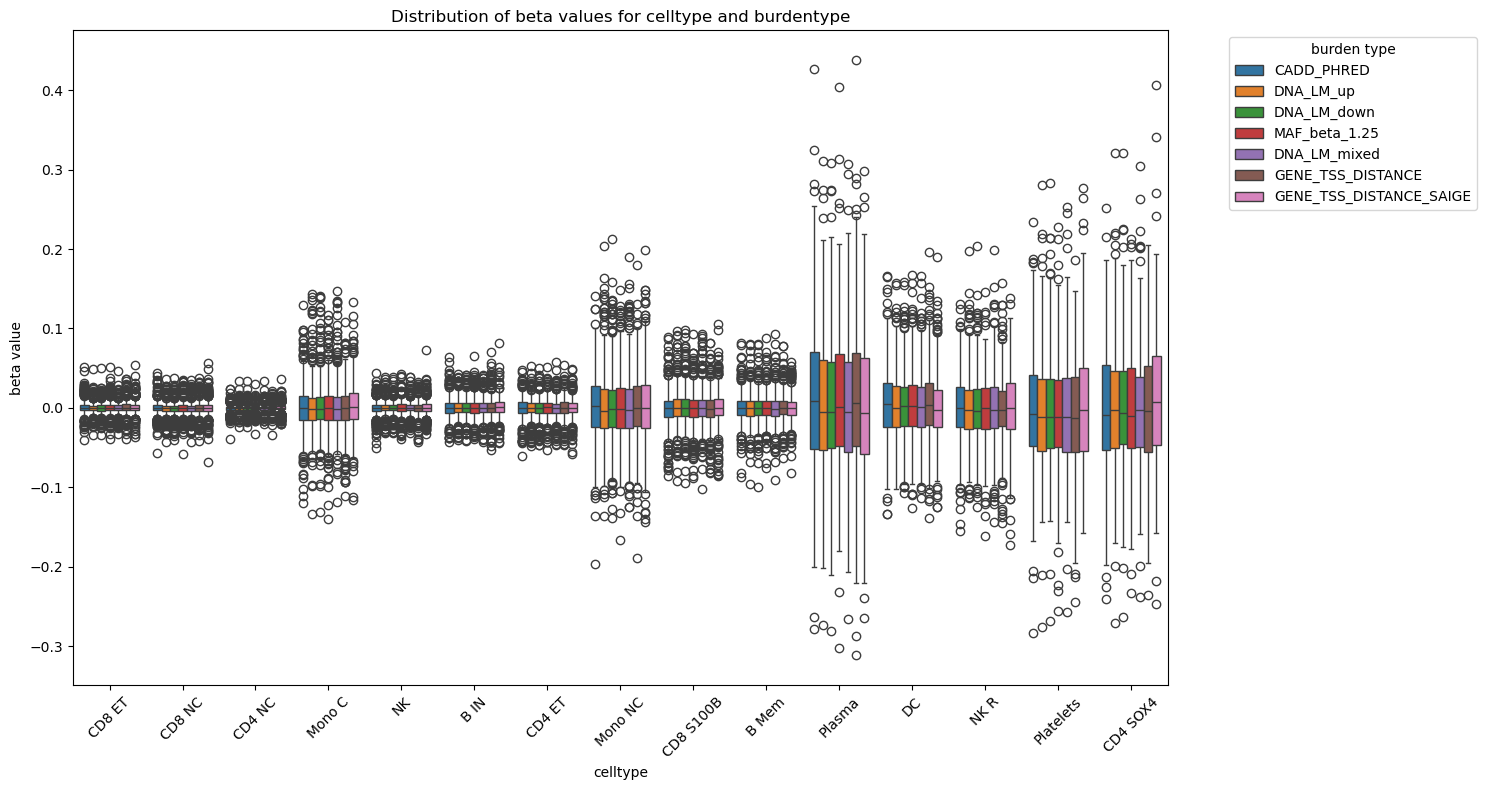

In [47]:
grouped_boxplot(df_final_)

In [42]:
def sign_agreement_heatmap_with_nan(df):
    def sign_agreement(values):
        return all(x > 0 for x in values) or all(x < 0 for x in values)

    # Filter: Nur Gruppen mit mehr als einem Eintrag
    filtered_df = df.groupby(['burden_gene', 'cell_type']).filter(lambda group: len(group) > 1)

    # Sign Agreement berechnen für gefilterte Daten
    sign_agreement_df = filtered_df.groupby(['burden_gene', 'cell_type'])['beta'].apply(sign_agreement).reset_index()
    sign_agreement_df.columns = ['burden_gene', 'cell_type', 'sign_agreement']
    
    # Pivot-Tabelle erstellen
    heatmap_data = sign_agreement_df.pivot_table(
        index='burden_gene', 
        columns='cell_type', 
        values='sign_agreement', 
        fill_value=np.nan  # NaN für fehlende Werte
    )
    
    # Heatmap erstellen
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap="Greens",  # Grün für Konsistenz
        cbar_kws={'label': 'Sign Agreement (1=Consistent, 0=Inconsistent)'},
        mask=heatmap_data.isnull()  # NaN maskieren
    )
    plt.title("Sign Agreement Heatmap Across Burden Genes and Cell Types")
    plt.xlabel("Cell type")
    plt.ylabel("Burden Gene")
    plt.tight_layout()
    plt.show()

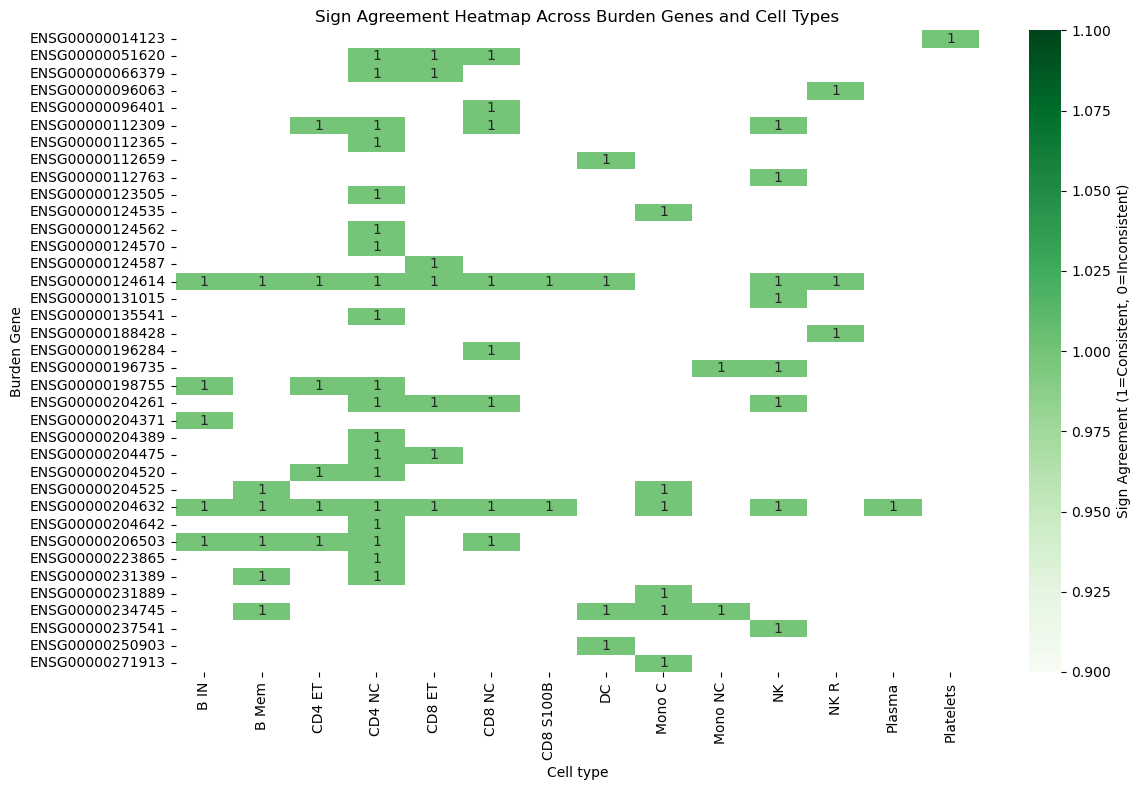

In [150]:
sign_agreement_heatmap_with_nan(df_final_6[df_final_6['significant']])

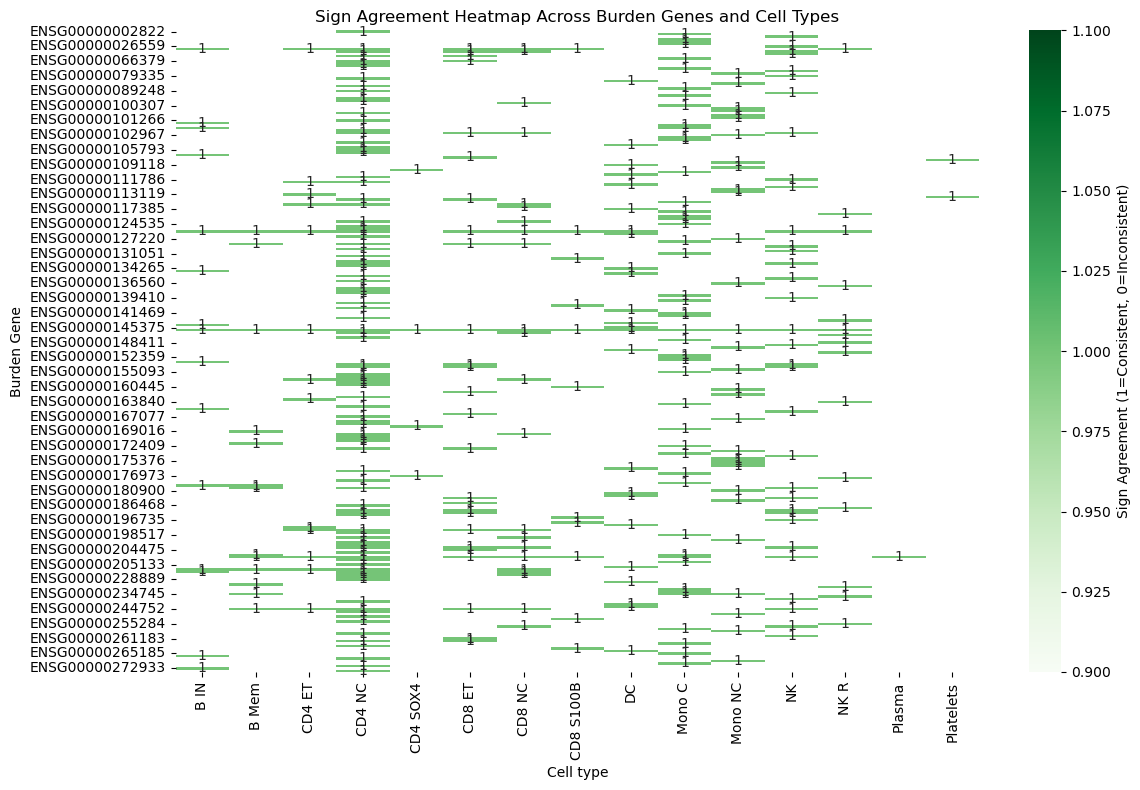

In [43]:
sign_agreement_heatmap_with_nan(all_results[all_results['significant']])

## Pseudobulk Expression Data



In [1]:
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *
from cellink.tl._eqtl import _get_pb_data
from plotnine import *
from itertools import islice

import warnings
warnings.filterwarnings("ignore")


/data/nasif12/home_if12/l_pock/.conda/envs/tap_scgenetics_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_pb_data_for_ct_per_gene(data, all_burdens, eigenvec, celltype, target_chrom):
    """
    data: DonorData object, annotated (output from run_data_annotation.py)
    all_burdens: pd.DataFrame, computed burden scores (output from run_compute_burdens.py)
    eigenvec: pd.DataFrame 
                (eigenvec = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/pcdir/wgs.dose.filtered.R2_0.8.filtered.pruned.eigenvec", sep=' ', header=None)
    celltype: Str, cell type for which pb are computed
    target_chrom: Str

    returns: pb_by_gene_df, pd.DataFrame: sample id, pb_geneexpressions
    """
    eigenvec.index = eigenvec[1]
    eigenvec = eigenvec.iloc[:, 2:]
    eigenvec = eigenvec[eigenvec.index.isin(all_burdens.index.unique())]

    pb_data=_get_pb_data(
        scdata=data.adata,
        gdata=data.gdata,
        cell_type= celltype,
        target_chromosome= target_chrom,
        donor_key_in_scdata = "individual",
        sex_key_in_scdata = "sex",
        age_key_in_scdata = "age",
        pseudobulk_aggregation_type= "mean",
        min_individuals_threshold=10,
        n_top_genes = 5_000,
        n_sc_comps= 15,
        n_genetic_pcs= 20,
        n_cellstate_comps= 50,
        eigenvector_df=eigenvec
    )
    
    pb_data_all_genes = pb_data.adata.layers["mean"]
    pb_by_gene_df = pd.DataFrame(pb_data_all_genes, columns=pb_data.adata.var_names, index=pb_data.adata.obs_names)
    
    return(pb_by_gene_df)


def burdenscore_with_pb_expression(pb_by_gene_df, geneid, all_burdens, burden_type, celltype):
    """
    for a given gene, burdentype and celltype: combined info in one dataframe
    
    pb_by_gene_df: pd.DataFrame (output, get_pb_data_for_ct_per_gene)
    geneid: str
    all_burdens: pd.DataFrame, computed burden scores (output from run_compute_burdens.py)
    burden_type: Str
    celltype: Str (musst be the same as used in get_pb_data_for_ct_per_gene)

    returns: pd.DataFrame, cols: burdenscores, pb_expr, celltype
    """
    burden_type_gene=pd.DataFrame(all_burdens[all_burdens["Geneid"]==geneid][burden_type])
    # add pb expr
    burden_type_gene["pb_expr"]=pb_by_gene_df[geneid]
    burden_type_gene["cell_type"]= celltype
    return(burden_type_gene)


def plot_burden_expre_corr(burden_type_gene, burden_type, geneid):
    """
    plots the relation between pb expression and the burden score

    burden_type_gene:  pd.DataFrame (output, burdenscore_with_pb_expression, 
                            can be concatinated for multiple cell types)
    burden_type: Str 
    """
    plot = (
        ggplot(burden_type_gene, aes(x = burden_type, y = "pb_expr"))
        + labs(x = "Gene score",  title=f"Gene: {geneid}, annotation: {burden_type}")
        + theme_classic()
        + geom_smooth()
        + geom_point()
        + facet_wrap("cell_type", scales = "free")
        + theme(legend_position="top", figure_size = (5,5), plot_title=element_text(size=10))
    )
    plot
    return(plot)

In [3]:
def plot_burden_expre_corr(burden_type_gene, burden_type, geneid, chrom,save=""):
    """
    plots the relation between pb expression and the burden score

    burden_type_gene:  pd.DataFrame (output, burdenscore_with_pb_expression, 
                            can be concatinated for multiple cell types)
    burden_type: Str 
    """
    fig_height = 7
    fig_length = 4
    title = 12
    axis_title = 10
    axis_text = 8
    facet_text = 8
    n_celltypes = burden_type_gene["cell_type"].unique()
    if len(n_celltypes) > 11:
        fig_height = 20
        fig_length = 18
        title = 23
        axis_title = 18
        axis_text = 15
        facet_text = 15
    elif len(n_celltypes) > 6:
        fig_height = 12
        fig_length = 8
        title = 15
        axis_title = 14
        axis_text = 12
        facet_text = 12

    if burden_type == "GENE_TSS_DISTANCE":
        axis_text = axis_text/3

    plot = (
    ggplot(burden_type_gene, aes(x = burden_type, y = "pb_expr"))
    + labs(x = "Gene score", title=f"Gene: {geneid}, Annotation: {burden_type}")
    + theme_classic()
    + geom_smooth()
    + geom_point()
    + facet_wrap("cell_type", scales = "free")
    + theme(legend_position="top", 
            figure_size=(fig_height,fig_length),
            plot_title=element_text(size=title),  # Increase title font size
            axis_title_x=element_text(size=axis_title),  # Increase x-axis title font size
            axis_title_y=element_text(size=axis_title),  # Increase y-axis title font size
            axis_text_x=element_text(size=axis_text),   # Increase x-axis tick labels font size
            axis_text_y=element_text(size=axis_text),    # Increase y-axis tick labels font size)
            strip_text=element_text(size=facet_text)
        )
    )
    plot.show()
    if save != "":
        plot_name = f"{save}/dotplot_grid_{burden_type}_{geneid}_chr{chrom}.png"
        plot.save(plot_name, dpi=300, width=fig_length, height=fig_height)

In [4]:
def get_pb_plots(data,
                 df_burdens_chrom,
                 eigenvec,
                 chrom,
                 cell_types=['CD8 ET', 'CD8 NC', 'CD4 NC', 'Mono C', 'NK', 'B IN', 'CD4 ET', 'Mono NC', 'CD8 S100B', 'B Mem', 'Plasma', 'DC', 'NK R','CD4 SOX4'],
                 burden_types=['CADD_PHRED', 'DNA_LM_up', 'DNA_LM_down', 'MAF_beta_1.25', 'DNA_LM_mixed', 'GENE_TSS_DISTANCE', 'GENE_TSS_DISTANCE_SAIGE'],
                 gene_limit=3,
                 gene_list=[],
                 save_dir=""):
    """
    plots the relation between pb expression and the burden score per chromosome and cell_type for set number of genes

    data: GeneAnnoData Object to get pb from
    df_burdens_chrom (pd.DataFrame): burden results
    eigenvec (pd.DataFrame): read eigenvector object without processing
    chrom (str): chromosome number
    cell_types (list of string): list of cell types
    burden_types (list of string): list of burden annotations
    gene_limit (int): max genes that should be taken for plotting
    gene_list (list of str): alternatively to gene_limit set a list of genes
    save_dir (str): dir path where to save the plots (plot name will be generated)
    """
    all_pb_X = []
    burdens_expr_per_gene = {}
    for cell_type in cell_types:
        print(f"Getting PB {cell_type}")
        pb_X = get_pb_data_for_ct_per_gene(data, df_burdens_chrom, eigenvec, cell_type, chrom)
        all_pb_X.append(pb_X)
        # define genes to create plots for
        for_genes = pb_X.columns[:gene_limit] # first gene_limit genes from pb_X
        if len(gene_list) != 0: # take input genes
            for_genes = gene_list
        for gene in for_genes:
            if gene in pb_X.keys():
                for burden in burden_types:
                    # get burden scores and save per burden annotation and gene the pb expression results
                    burdens_expr = burdenscore_with_pb_expression(pb_X, gene, df_burdens_chrom, burden, cell_type)
                    if burden not in burdens_expr_per_gene.keys():
                        burdens_expr_per_gene[burden] = {gene: burdens_expr}
                    else:
                        if gene not in burdens_expr_per_gene[burden].keys():
                            burdens_expr_per_gene[burden][gene] = burdens_expr
                        else:
                            burdens_expr_per_gene[burden][gene] = pd.concat([burdens_expr_per_gene[burden][gene],burdens_expr], ignore_index=True)

    # create plots
    for annotation, genes in burdens_expr_per_gene.items():
        for gene, expression_data in islice(genes.items(), 3):
            plot_burden_expre_corr(expression_data, annotation, gene, chrom, save_dir)   

In [5]:
out_path = Path("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/")
eigenvec = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/pcdir/wgs.dose.filtered.R2_0.8.filtered.pruned.eigenvec", sep=' ', header=None)
save_dir = out_path / "data_plots/pb_expression"
df_burdens = pd.read_parquet(out_path/"burdens/all_burdens.parquet")
all_results = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_FDR_corrected.csv")


In [21]:
df_summary = (
    all_results.query("significant")
    .groupby("burden_gene")
    .agg(
        Number_of_Appearence=("celltype-annotation", "nunique"),  # Count unique significant cell types
        Chromosomes=("chromosome", lambda x: ", ".join(map(str, sorted(x.unique())))),  # Aggregate unique chromosomes
        Cell_Types=("cell_type", lambda x: sorted(x.unique())),  # Aggregate unique cell types
        Burden_Types=("burden_type", lambda x: sorted(x.unique())),  # Aggregate unique burden types
    )
    .sort_values(by="Number_of_Appearence", ascending=False)  # Sort by highest number of significant cell types
)
df_summary

Number_of_Appearence Chromosomes  \
burden_gene                                         
ENSG00000145425                    46           4   
ENSG00000124614                    45           6   
ENSG00000204632                    30           6   
ENSG00000244752                    22          22   
ENSG00000102898                    20          16   
...                               ...         ...   
ENSG00000167768                     1          12   
ENSG00000167552                     1          12   
ENSG00000107371                     1           9   
ENSG00000107554                     1          10   
ENSG00000174292                     1          17   

                                                        Cell_Types  \
burden_gene                                                          
ENSG00000145425  [B IN, B Mem, CD4 ET, CD4 NC, CD4 SOX4, CD8 ET...   
ENSG00000124614  [B IN, B Mem, CD4 ET, CD4 NC, CD8 ET, CD8 NC, ...   
ENSG00000204632  [B Mem, CD4 ET, CD4 NC, CD8 ET, CD8 NC, CD8 S1...   
ENSG00000244752  [B IN, B Mem, CD4 ET, CD4 NC, CD8 ET, CD8 NC, ...   
ENSG00000102898     [B Mem, CD4 NC, CD8 ET, CD8 NC, CD8 S100B, NK]   
...                                                            ...   
ENSG00000167768                                           [CD4 NC]   
ENSG00000167552                                           [Mono C]   
ENSG00000107371                                           [CD4 NC]   
ENSG00000107554                                          [Mono NC]   
ENSG00000174292                                           [CD4 ET]   

                                                      Burden_Types  
burden_gene                                                         
ENSG00000145425  [CADD_PHRED, GENE_TSS_DISTANCE, GENE_TSS_DISTA...  
ENSG00000124614  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, DNA_LM...  
ENSG00000204632  [CADD_PHRED, GENE_TSS_DISTANCE, GENE_TSS_DISTA...  
ENSG00000244752  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, GENE_T...  
ENSG00000102898  [CADD_PHRED, DNA_LM_down, DNA_LM_up, GENE_TSS_...  
...                                                            ...  
ENSG00000167768                          [GENE_TSS_DISTANCE_SAIGE]  
ENSG00000167552                                [GENE_TSS_DISTANCE]  
ENSG00000107371                          [GENE_TSS_DISTANCE_SAIGE]  
ENSG00000107554                                        [DNA_LM_up]  
ENSG00000174292                          [GENE_TSS_DISTANCE_SAIGE]  

[542 rows x 4 columns]

In [22]:
len(df_summary['Cell_Types'].loc['ENSG00000145425'])

13

In [26]:
filtered_df = df_summary[(df_summary['Cell_Types'].apply(len) < 3) & (df_summary['Burden_Types'].apply(len) > 4)]

Number_of_Appearence Chromosomes        Cell_Types  \
burden_gene                                                           
ENSG00000226816                     9           7  [CD4 NC, CD8 NC]   
ENSG00000198520                     7           1  [CD4 NC, CD8 NC]   
ENSG00000168268                     6           3          [Mono C]   
ENSG00000254206                     6          16       [CD8 S100B]   
ENSG00000003147                     6           7          [Mono C]   
ENSG00000109184                     5           4         [Mono NC]   
ENSG00000129691                     5           8          [Mono C]   
ENSG00000151729                     5           4          [Mono C]   
ENSG00000110203                     5          11          [Mono C]   
ENSG00000099365                     5          16          [CD4 NC]   
ENSG00000160445                     5           9       [CD8 S100B]   
ENSG00000132958                     5          13          [CD4 NC]   
ENSG00000132953                     5          13       [CD8 S100B]   

                                                      Burden_Types  
burden_gene                                                         
ENSG00000226816  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, DNA_LM...  
ENSG00000198520  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...  
ENSG00000168268  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, DNA_LM...  
ENSG00000254206  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, DNA_LM...  
ENSG00000003147  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, DNA_LM...  
ENSG00000109184  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...  
ENSG00000129691  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...  
ENSG00000151729  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...  
ENSG00000110203  [CADD_PHRED, DNA_LM_down, DNA_LM_up, GENE_TSS_...  
ENSG00000099365  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...  
ENSG00000160445  [CADD_PHRED, DNA_LM_down, DNA_LM_mixed, DNA_LM...  
ENSG00000132958  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...  
ENSG00000132953  [DNA_LM_down, DNA_LM_mixed, DNA_LM_up, GENE_TS...

## Load Images we created


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimgimport matplotlib.pyplot as plt
img = mpimg.imread('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/data_plots/pb_expression/beta_distribution_variability.png')  # Pfad zum Bild einsetzen

# Bild anzeigen
plt.imshow(img)

plt.show()